<a href="https://colab.research.google.com/github/yulmu99/Playdata/blob/main/mini_project/titanic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# titanic호 탑승객의 생존유무(survived) 예측

In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
# 코렙 한글깨짐 방지
!apt -qq -y install fonts-nanum > /dev/null

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name() 
#fm._rebuild()  


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.train_csv = '/content/data/MyDrive/mini_project/titanic/train.csv' 
args.test_csv = '/content/data/MyDrive/mini_project/titanic/test.csv'
args.default_submission_csv = '/content/data/MyDrive/mini_project/titanic/submission.csv'
args.submission_csv ='/content/data/MyDrive/mini_project/titanic/submission_0416.csv'
args.save_results = "model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

## 데이터 불러오기

- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:
raw_train = pd.read_csv(args.train_csv) 
raw_test = pd.read_csv(args.test_csv)

raw_train.shape, raw_test.shape   

((916, 12), (393, 11))

In [ ]:
raw_train.columns  

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
raw_train['passengerid'].nunique()

916

In [ ]:
#passengerid는 모두 다른 값이므로 삭제
del raw_train['passengerid']

In [ ]:
raw_test.set_index(['passengerid'], inplace=True) 
print(f'{raw_test.shape}')

(393, 10)


In [ ]:
raw_train.shape , raw_test.shape

((916, 11), (393, 10))

In [ ]:
raw_train.columns

Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
raw_test.columns

Index(['pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')

## train_test_split

raw train data -> train, test로 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(raw_train, test_size=0.3, stratify=raw_train['survived'],random_state=args.random_state) 

In [ ]:
train.shape, test.shape

((641, 11), (275, 11))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  641 non-null    int64  
 1   pclass    641 non-null    int64  
 2   name      641 non-null    object 
 3   gender    641 non-null    object 
 4   age       512 non-null    float64
 5   sibsp     641 non-null    int64  
 6   parch     641 non-null    int64  
 7   ticket    641 non-null    object 
 8   fare      641 non-null    float64
 9   cabin     135 non-null    object 
 10  embarked  641 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 60.1+ KB


In [ ]:
train.describe(include='all')

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
count,641.000000,641.000000,641,641,512.000000,641.000000,641.000000,641,641.000000,135,641
unique,NaN,NaN,641,2,NaN,NaN,NaN,529,NaN,110,3
top,NaN,NaN,"Ohman, Miss. Velin",male,NaN,NaN,NaN,3101295,NaN,B96 B98,S
freq,NaN,NaN,1,407,NaN,NaN,NaN,5,NaN,3,455
mean,0.377535,2.305772,NaN,NaN,30.344082,0.466459,0.368175,NaN,31.654446,NaN,NaN
std,0.485149,0.829221,NaN,NaN,14.492658,0.961386,0.897140,NaN,49.827609,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.400000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,30.000000,NaN,NaN


- 이름(Name)은 모두 다르다.
- 성별(gender)은 407/641로 남성이 많다.
- 승선(Embarked)은 총 3개의 종류가 있고, S가 제일 많다.
- 티켓(Ticket)은 중복이 매우 적다.

In [ ]:
train.describe(include=np.number)

,survived,pclass,age,sibsp,parch,fare
count,641.000000,641.000000,512.000000,641.000000,641.000000,641.000000
mean,0.377535,2.305772,30.344082,0.466459,0.368175,31.654446
std,0.485149,0.829221,14.492658,0.961386,0.897140,49.827609
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
train.describe(exclude=np.number)

,name,gender,ticket,cabin,embarked
count,641,641,641,135,641
unique,641,2,529,110,3
top,"Ohman, Miss. Velin",male,3101295,B96 B98,S
freq,1,407,5,3,455


## Correlating

In [ ]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR) 

- 각 column별 상관관계

In [ ]:
train.corr()

<ipython-input-23-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.299053,-0.025265,-0.013008,0.067856,0.232942
pclass,-0.299053,1.000000,-0.378336,0.036405,0.039566,-0.543117
age,-0.025265,-0.378336,1.000000,-0.245089,-0.134196,0.125341
sibsp,-0.013008,0.036405,-0.245089,1.000000,0.367602,0.180221
parch,0.067856,0.039566,-0.134196,0.367602,1.000000,0.199064
fare,0.232942,-0.543117,0.125341,0.180221,0.199064,1.000000


In [ ]:
#히트맵 함수 
def heatmap(data):
    fig , ax = plt.subplots(figsize =(12, 9))
    #colormap = sns.diverging_palette(200, 10, as_cmap = True)
    
    fig = sns.heatmap(data.corr(), 
          annot = True, # 숫자 표시 여부
          linewidths = 0.5, # 선의 굵기
          linecolor = 'white', # 선의 색깔
          fmt = '.2f', # 소수점 포맷팅 형태
          cmap='RdYlGn') 


          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.299053 -0.025265 -0.013008  0.067856  0.232942
pclass   -0.299053  1.000000 -0.378336  0.036405  0.039566 -0.543117
age      -0.025265 -0.378336  1.000000 -0.245089 -0.134196  0.125341
sibsp    -0.013008  0.036405 -0.245089  1.000000  0.367602  0.180221
parch     0.067856  0.039566 -0.134196  0.367602  1.000000  0.199064
fare      0.232942 -0.543117  0.125341  0.180221  0.199064  1.000000


<ipython-input-25-b307c422b544>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())
<ipython-input-24-ed7c65a9b3f1>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(data.corr(),


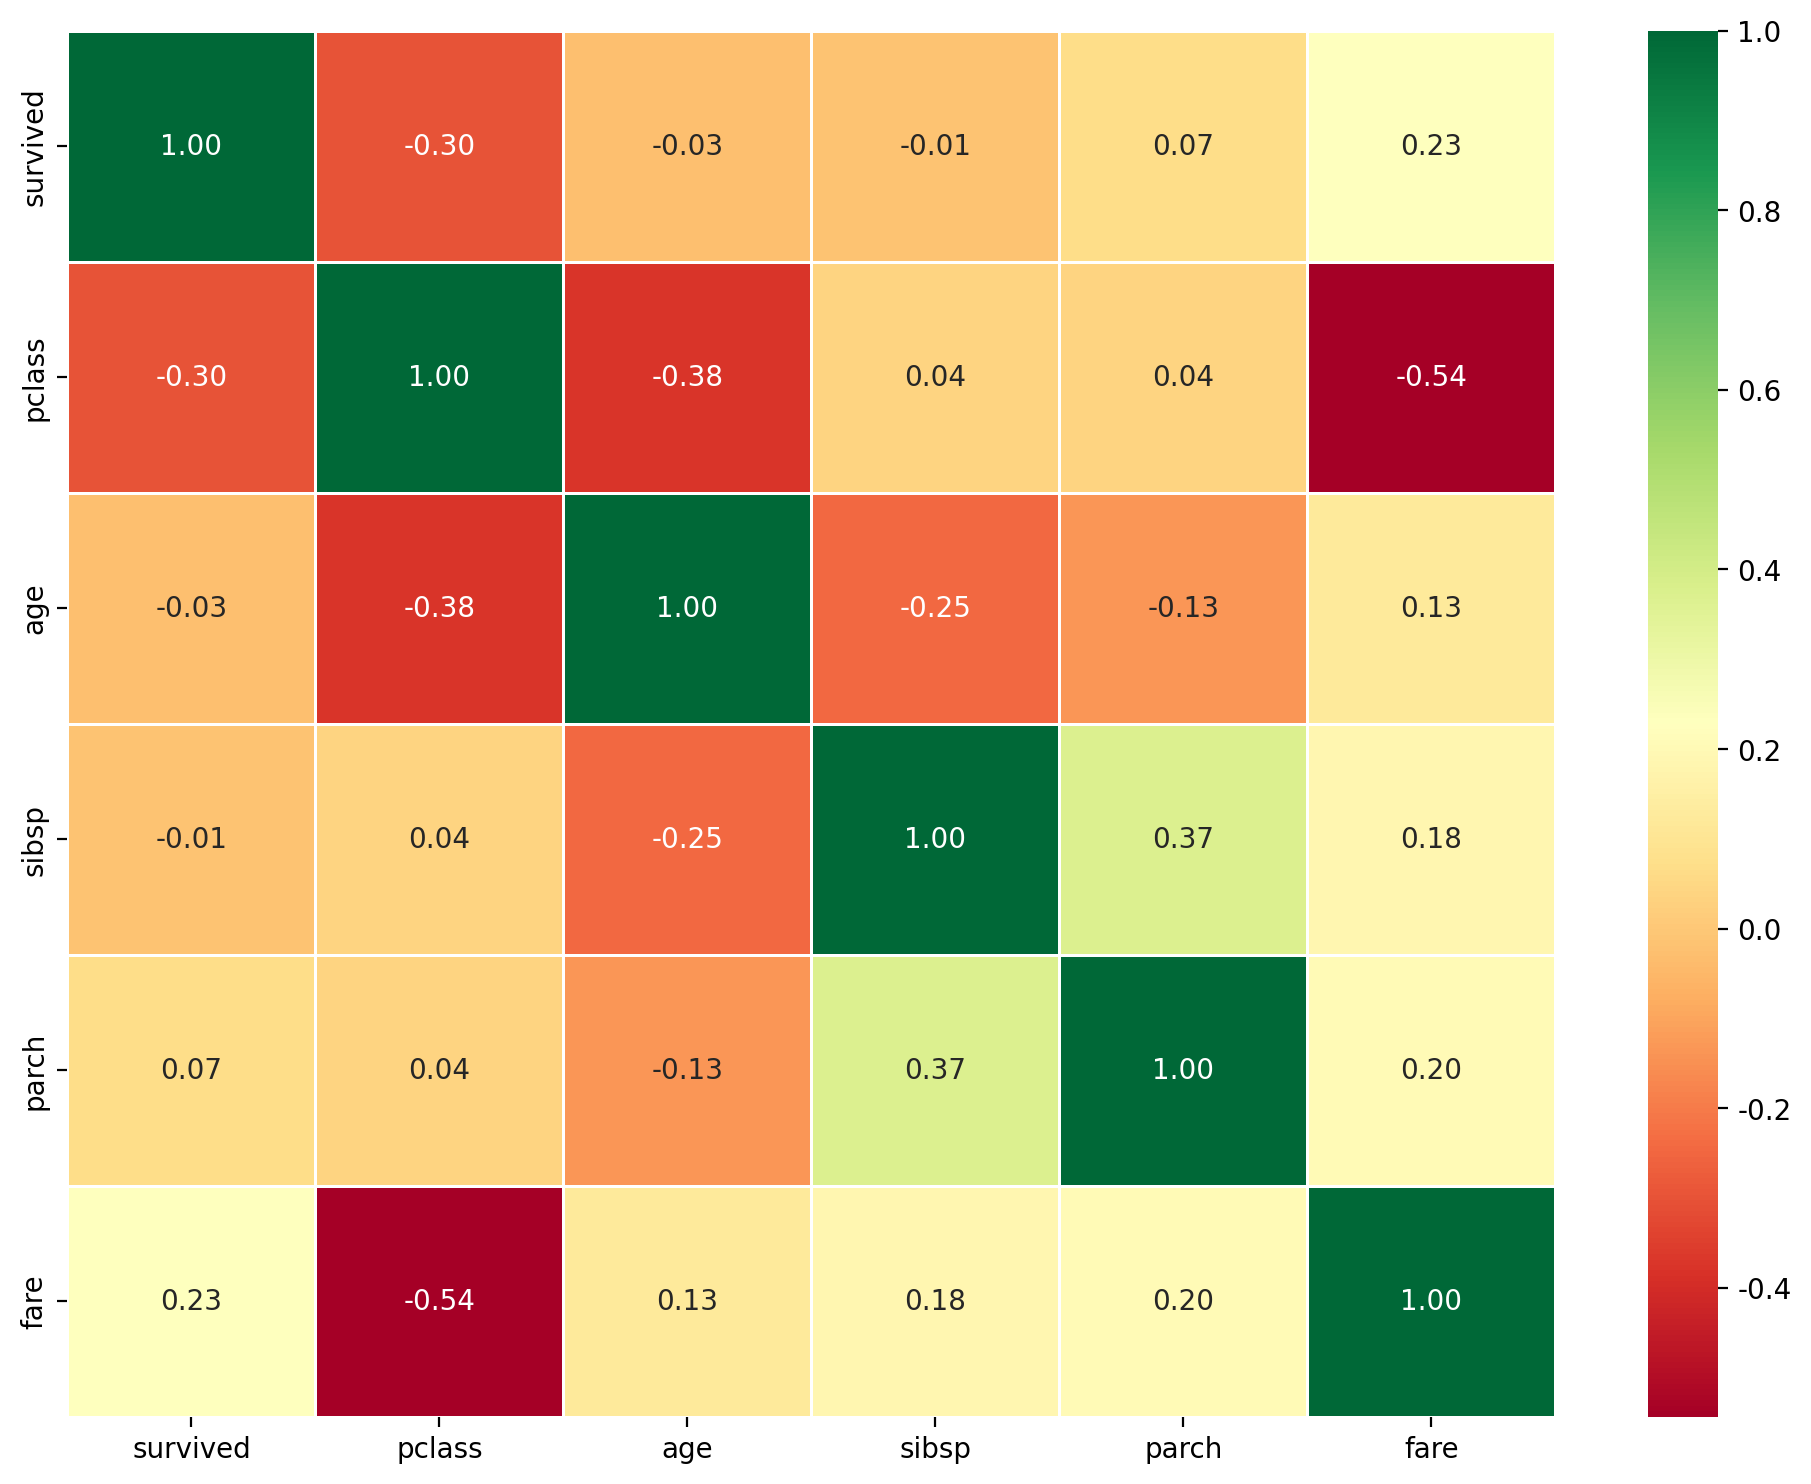

In [ ]:
print(train.corr())
heatmap(train)

- 타겟 변수와는 상관관계가 높을수록
- 피쳐 변수 간에는 상관관계가 낮을수록 좋다

- fare와 pclass의 상관관계 0.54로 높다 -> 둘 중의 하나는 다른 feature로 대체하는게 좋을 것 같다.
- survived와 pclass의 상관관계가 가장 크기 때문에 fare를 대체

- fare
> parch > sibsp > age <Br>
> parch로 하나 만들어보자!

- parch 
> sibsp > fare

- sibsp 
> parch > age > fare

- age
> pclass > sibsp > parch > fare

- pclass
> fare > age 

`survived와 corr`
> pclass > fare 이외에는 매우 낮은 상관관계

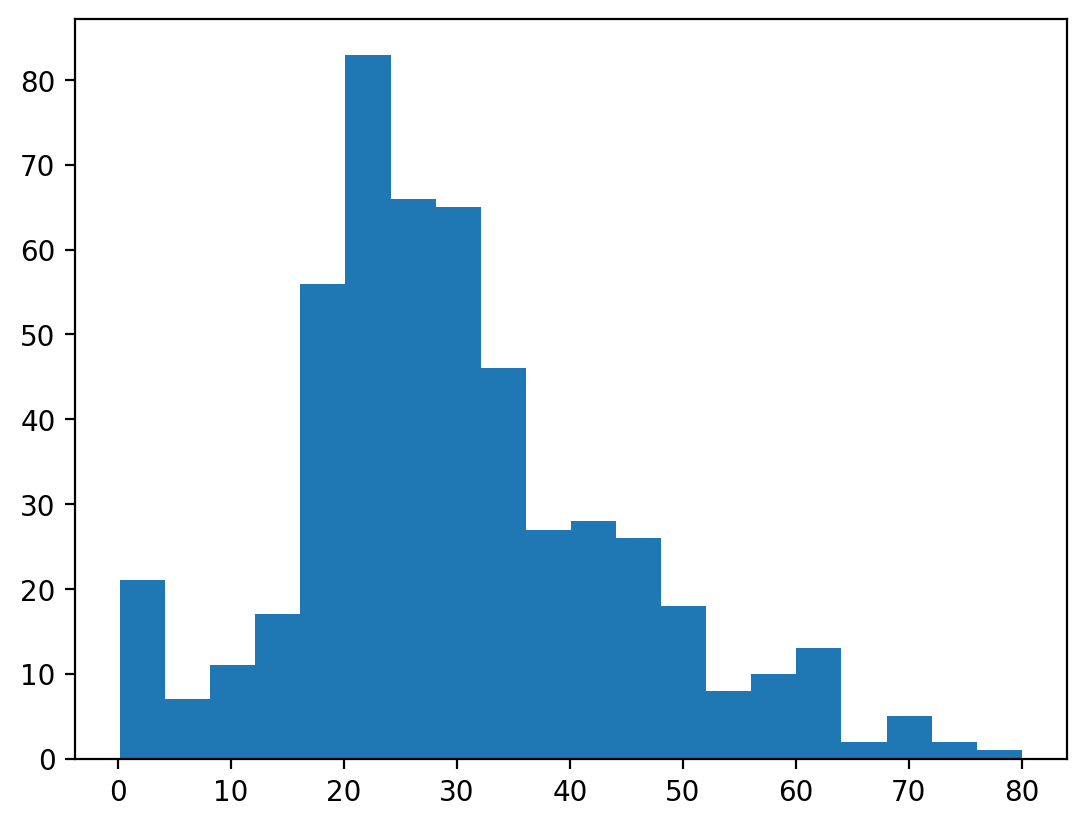

In [ ]:
plt.hist(train['age'], bins=20)
plt.show()

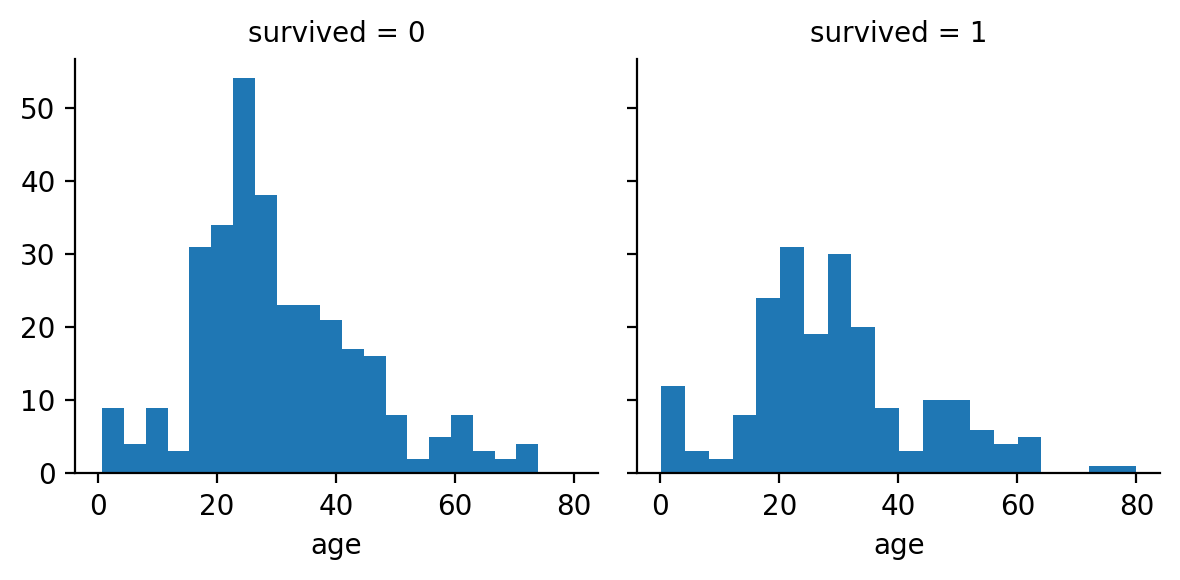

In [ ]:
#age
g = sns.FacetGrid(train, col ='survived')
g.map(plt.hist,'age', bins=20)

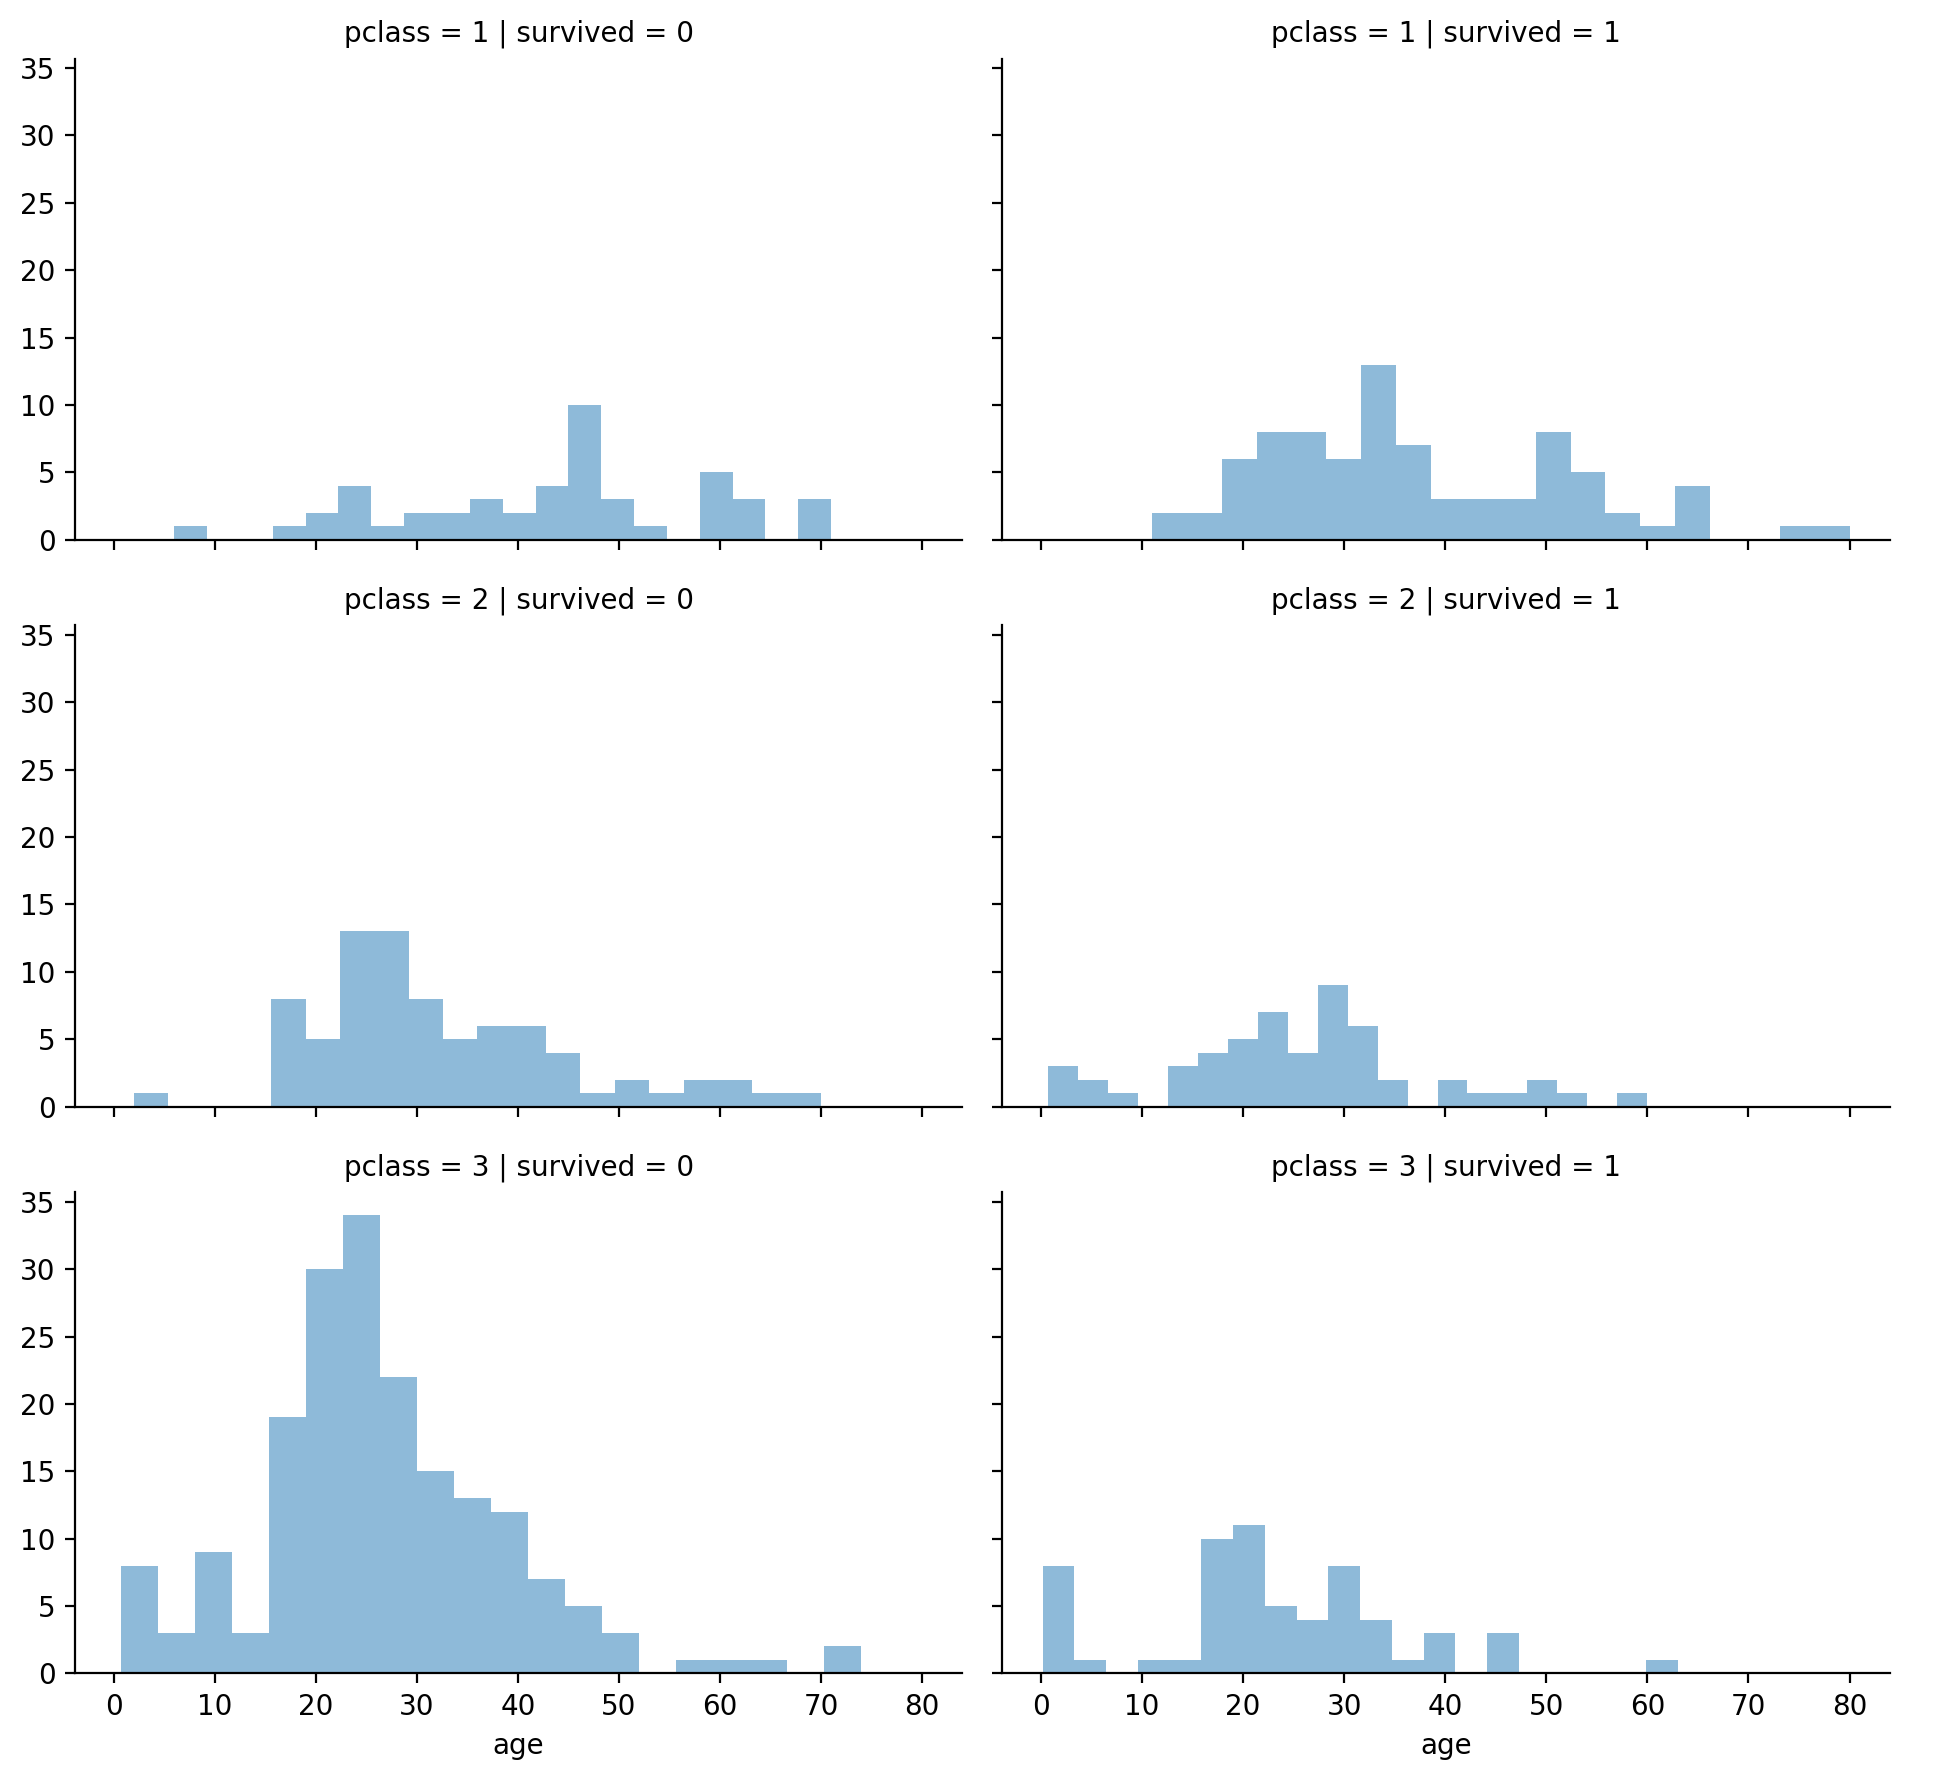

In [ ]:
#pclasss
grid = sns.FacetGrid(train,col='survived',row='pclass', aspect=1.6)
grid.map(plt.hist,'age',alpha=.5, bins=20)
grid.add_legend()

- pclass에 따라 승객의 나이 분포 다름
- Pclass=2, Pclass=3에서 영아 승객은 대부분 생존
- Pclass=3인 승객수가 가장 많지만 대다수가 생존하지 못함

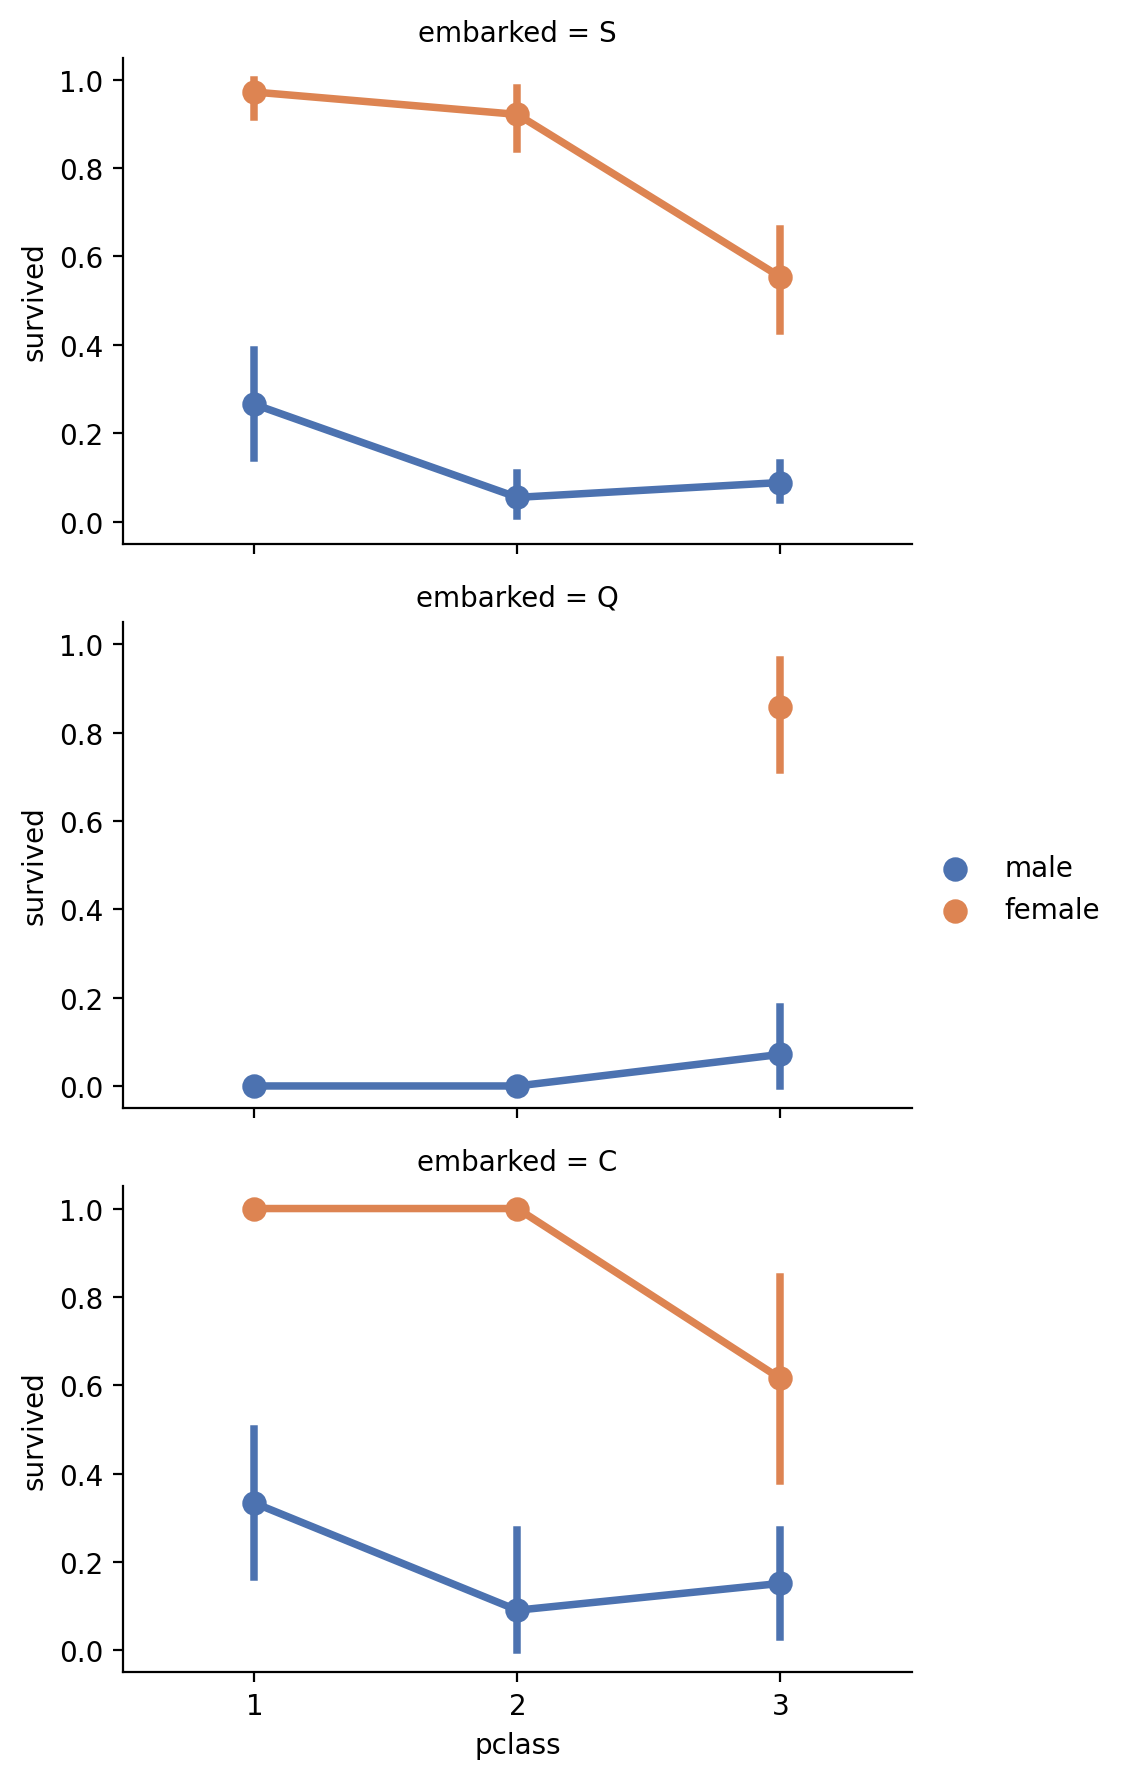

In [ ]:
#embarked
grid = sns.FacetGrid(train, row='embarked',  aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'gender', palette='deep',order=[1,2,3], hue_order=["male","female"])
grid.add_legend()

plt.show()

In [ ]:
df = train[['gender','pclass','embarked','survived']]
grouped = df.groupby(['embarked','pclass','gender'])
gdf = grouped.mean()
gdf

survived
embarked pclass gender          
C        1      female  1.000000
                male    0.333333
         2      female  1.000000
                male    0.090909
         3      female  0.615385
                male    0.151515
Q        1      male    0.000000
         2      male    0.000000
         3      female  0.857143
                male    0.071429
S        1      female  0.972222
                male    0.265306
         2      female  0.921569
                male    0.054795
         3      female  0.553846
                male    0.088398

- 여성의 생존 비율 높음
- Embarked=S에서 남성 생존 비율 높음

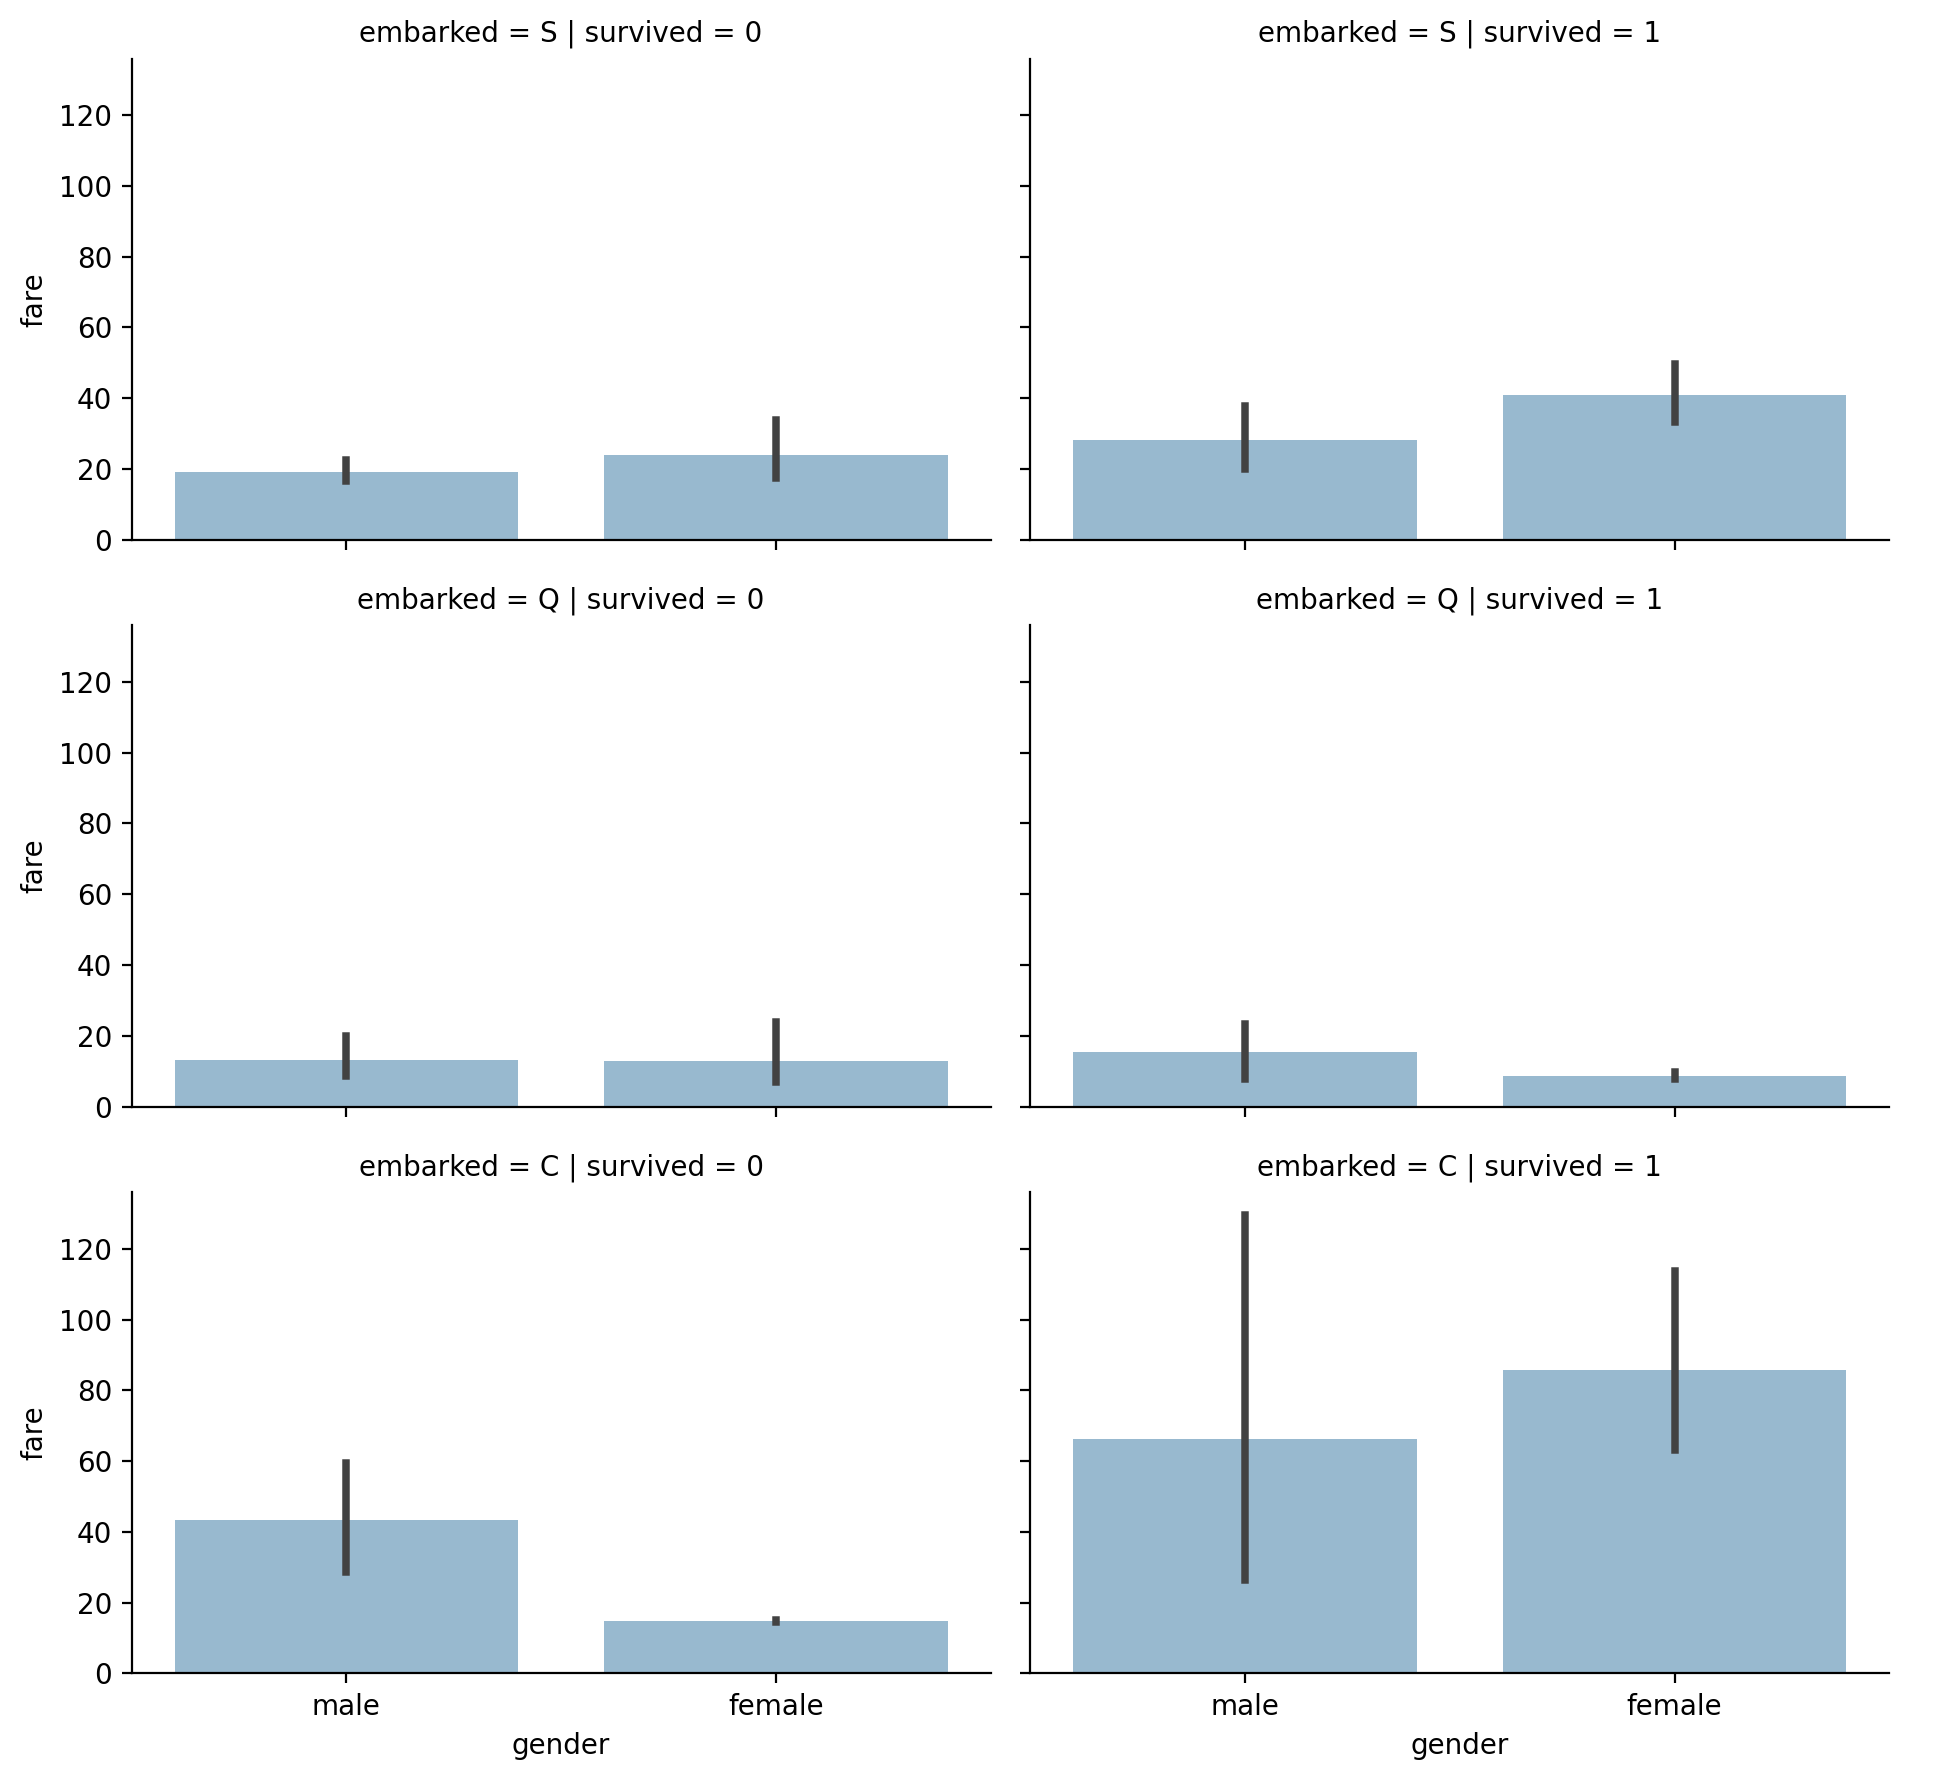

In [ ]:
grid = sns.FacetGrid(train, row='embarked', col='survived',  aspect=1.6)
grid.map(sns.barplot, 'gender', 'fare', alpha=.5, order=["male","female"])
grid.add_legend()

plt.show()

> 주요 함수 정의
>> check_shape()  / check_columns() 


In [ ]:
#shape 확인 함수
def check_shape(df1, df2, df3):
    return df1.shape , df2.shape, df3.shape

In [ ]:
check_shape(train,test,raw_test)

((641, 11), (275, 11), (393, 10))

In [ ]:
#columns 확인 함수
def check_columns(df1, df2, df3):
    return df1.columns , df2.columns, df3.columns

In [ ]:
check_columns(train,test,raw_test)

(Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
        'ticket', 'fare', 'cabin', 'embarked'],
       dtype='object'),
 Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
        'ticket', 'fare', 'cabin', 'embarked'],
       dtype='object'),
 Index(['pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'ticket', 'fare',
        'cabin', 'embarked'],
       dtype='object'))

### EDA

In [ ]:
tr = train.copy()
te = test.copy()
raw_te = raw_test.copy()

#### pivoting features

In [ ]:
#pclass
tr[['pclass','survived']].groupby(['pclass'],as_index=False).mean().sort_values(by='survived',ascending=False)

,pclass,survived
0,1,0.618421
1,2,0.404255
2,3,0.261494


In [ ]:
#gender
tr[['gender','survived']].groupby(['gender'],as_index=False).mean().sort_values(by='survived',ascending=False)

,gender,survived
0,female,0.816239
1,male,0.125307


In [ ]:
#sibsp - 형제,배우자 수
tr[['sibsp','survived']].groupby(['sibsp'],as_index=False).mean().sort_values(by='survived',ascending=False)

,sibsp,survived
1,1,0.558442
2,2,0.421053
0,0,0.330317
4,4,0.100000
3,3,0.090909
5,5,0.000000
6,8,0.000000


In [ ]:
#parch - 부모,자녀 수
tr[['parch','survived']].groupby(['parch'],as_index=False).mean().sort_values(by='survived',ascending=False)

,parch,survived
7,9,1.000000
1,1,0.520548
2,2,0.479167
3,3,0.400000
0,0,0.348515
5,5,0.333333
4,4,0.250000
6,6,0.000000


### Data Preprocessing

##### age
- missing data : name title별 age평균으로 대체

 name title

In [ ]:
tr.name

812                                   Ohman, Miss. Velin
134                                  Buckley, Mr. Daniel
390                                    Jonsson, Mr. Carl
305                             Hassan, Mr. Houssein G N
203                                      Corn, Mr. Harry
                             ...                        
273                                    Davis, Miss. Mary
343                            Mulvihill, Miss. Bertha E
450    Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...
94                          Panula, Master. Urho Abraham
277                               Hunt, Mr. George Henry
Name: name, Length: 641, dtype: object

In [ ]:
print(f'before: {tr.shape , te.shape , raw_te.shape}')

tr['title'] = tr.name.map(lambda x : x.split(',')[1].split('.')[0])
te['title'] = te.name.map(lambda x : x.split(',')[1].split('.')[0])
raw_te['title'] = raw_te.name.map(lambda x : x.split(',')[1].split('.')[0])

print(f'after: {tr.shape , te.shape , raw_te.shape}')

before: ((641, 11), (275, 11), (393, 10))
after: ((641, 12), (275, 12), (393, 11))


In [ ]:
tr.title.value_counts()

 Mr          370
 Miss        126
 Mrs         106
 Master       22
 Rev           4
 Dr            3
 Col           3
 Major         2
 Capt          1
 Mlle          1
 Ms            1
 Sir           1
 Jonkheer      1
Name: title, dtype: int64

<Axes: xlabel='age', ylabel='title'>

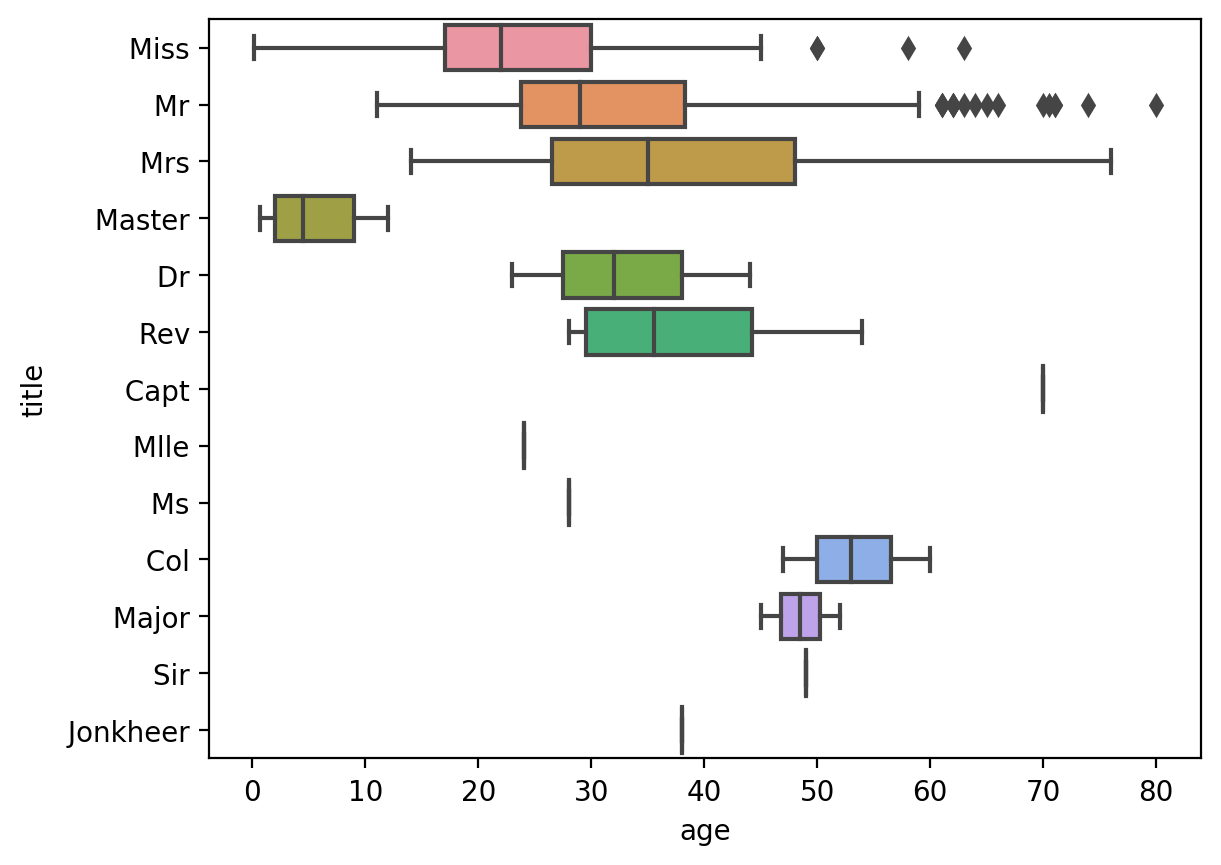

In [ ]:
#title별 age
sns.boxplot(y='title',x='age',data=tr)

In [ ]:
tr[['title','gender','age']].groupby(by=['gender','title']).mean()

age
gender title               
female  Miss      21.899238
        Mlle      24.000000
        Mrs       37.545455
        Ms        28.000000
male    Capt      70.000000
        Col       53.333333
        Dr        33.000000
        Jonkheer  38.000000
        Major     48.500000
        Master     5.347222
        Mr        32.107394
        Rev       38.250000
        Sir       49.000000

- title에서 데이터 수가 많은 상위 3개의 그룹(' Mr', ' Miss', ' Mrs')은 그대로 유지
- 'Master'는 어린아이들의 그룹이므로 유지 / 다만 남자 아이들만 속해 있으므로 Miss에서 여자 아이들은 Master로 이동
- 'Mlle','Ms' -> 'Miss' / 'Capt','Col','Dr','Jonkheer','Major','Rev','Sir' -> 'Mr'

In [ ]:
tr.loc[(tr.title == ' Master'),'age']

738    11.00
265     5.00
910    12.00
145     1.00
263     6.00
391      NaN
298     9.00
647     4.00
846     0.67
279     0.75
827     0.83
261    10.00
111     7.00
328     3.00
837     4.00
822      NaN
426      NaN
362     9.00
281     2.00
885      NaN
481     9.00
94      2.00
Name: age, dtype: float64

In [ ]:
#title 공백제거
tr['title']=tr['title'].map(lambda x : x.strip())
te['title']=te['title'].map(lambda x : x.strip())
raw_te['title']=raw_te['title'].map(lambda x : x.strip())

tr.title.unique()

array(['Miss', 'Mr', 'Mrs', 'Master', 'Dr', 'Rev', 'Capt', 'Mlle', 'Ms',
       'Col', 'Major', 'Sir', 'Jonkheer'], dtype=object)

In [ ]:
#master의 age 범위
tr.loc[tr.title=='Master','age'].agg(['min','max'])

#12살 이하의 아이들은 master로 

min     0.67
max    12.00
Name: age, dtype: float64

In [ ]:
tr.loc[(tr.age <= 12) & (tr.title != 'Master'),['title','age','gender']]

#Miss와 Mr에 존재 

,title,age,gender
305,Mr,11.00,male
403,Miss,1.00,female
549,Miss,2.00,female
126,Miss,11.00,female
604,Miss,4.00,female
760,Miss,0.75,female
674,Miss,0.17,female
80,Miss,8.00,female
713,Miss,9.00,female
754,Miss,2.00,female


In [ ]:
age=3
title ='mr'

(age<=12) & (title != 'Master')

True

In [ ]:
def change_master(title, age):
    ''' 
    12살 이하 아이들의 title을 Master로 변경하는 함수
    '''
    try:
        master = None
        if (age<=12) & (title != 'Master'):
            chg_master = 'Master'
        else:
            chg_master = title
        return chg_master
    except:
        ERROR

In [ ]:
print(f'before: {tr.shape , te.shape , raw_te.shape}')

tr['chg_master'] = tr.apply(lambda row : change_master(row['title'],row['age']) ,axis =1)
te['chg_master'] = te.apply(lambda row : change_master(row['title'],row['age']) ,axis =1)
raw_te['chg_master'] = raw_te.apply(lambda row : change_master(row['title'],row['age']) ,axis =1)

tr[['title','age','chg_master']] #변환이 잘 됬는지 확인

print(f'before: {tr.shape , te.shape , raw_te.shape}')

before: ((641, 12), (275, 12), (393, 11))
before: ((641, 13), (275, 13), (393, 12))


In [ ]:
tr.title.unique(), te.title.unique(), raw_te.title.unique()

(array(['Miss', 'Mr', 'Mrs', 'Master', 'Dr', 'Rev', 'Capt', 'Mlle', 'Ms',
        'Col', 'Major', 'Sir', 'Jonkheer'], dtype=object),
 array(['Mr', 'Dr', 'Miss', 'Mrs', 'Master', 'Rev', 'the Countess', 'Don'],
       dtype=object),
 array(['Miss', 'Mrs', 'Mr', 'Master', 'Rev', 'Dona', 'Dr', 'Lady', 'Mme',
        'Mlle', 'Col', 'Ms'], dtype=object))

In [ ]:
tr['title'] = tr['chg_master']
te['title'] = te['chg_master']
raw_te['title'] = raw_te['chg_master']

In [ ]:
list(tr['title'].value_counts().index[:3])

['Mr', 'Miss', 'Mrs']

In [ ]:
tr.loc[(tr.title == 'Miss') | (tr.title =='Mrs'),['title','age']].groupby('title').describe()

age                                                    
      count       mean        std   min   25%   50%   75%   max
title                                                          
Miss   85.0  26.041176   9.338289  13.0  20.0  23.0  30.0  63.0
Mrs    88.0  37.545455  14.015516  14.0  26.5  35.0  48.0  76.0

In [ ]:
def chg_title(title , gender, age):
    ''' 
    title과 gender, age를 이용해서
    te, raw_te에 존재하는 이외의 title을 
    tr의 title로 변환
    female 내에서는 Miss의 75% 사분위수를 기준으로 분류
    '''
    
    result = None
    try:
        if title in ['Mr', 'Miss','Mrs','Master']:
            result = title
        elif gender == 'male':
            result = 'Mr'
        elif gender == 'female':
            if age <= 30:
                result = 'Miss'
            else:
                result = 'Mrs'
        return result
    except:
        ERROR

In [ ]:
tr['title'] = tr.apply(lambda x : chg_title(x['title'],x['gender'],x['age']),axis =1)
te['title'] = te.apply(lambda x : chg_title(x['title'],x['gender'],x['age']),axis =1)
raw_te['title'] = raw_te.apply(lambda x : chg_title(x['title'],x['gender'],x['age']),axis =1)

In [ ]:
tr['title'].unique(), te['title'].unique(), raw_te['title'].unique()

(array(['Miss', 'Mr', 'Master', 'Mrs'], dtype=object),
 array(['Mr', 'Miss', 'Mrs', 'Master'], dtype=object),
 array(['Miss', 'Mrs', 'Mr', 'Master'], dtype=object))

In [ ]:
# def add_title(title):
#     result = 'Other'
#     try:
#         if title in list(tr['title'].value_counts().index[:3]):
#             return title
#         else:
#             return result
#     except:
#         return result
    
# tr['title'] = tr['title'].map(lambda x : add_title(x))
# te['title'] = te['title'].map(lambda x : add_title(x))
# raw_te['title'] = raw_te['title'].map(lambda x : add_title(x))

In [ ]:
# tr['title'].unique(), te['title'].unique(), raw_te['title'].unique()

In [ ]:
#name 삭제
print(f'before: {tr.shape , te.shape , raw_te.shape}')

del tr['name']
del te['name']
del raw_te['name']

print(f'after: {tr.shape , te.shape , raw_te.shape}')

before: ((641, 13), (275, 13), (393, 12))
after: ((641, 12), (275, 12), (393, 11))


- missing data

In [ ]:
#title별 age 평균
title_mean = tr[['title','age']].groupby('title',as_index=False).mean()
title_mean

,title,age
0,Master,4.953077
1,Miss,26.040230
2,Mr,32.796980
3,Mrs,37.545455


In [ ]:
cond= []
tr[cond]

for i in range(len(title_mean.title)):
    tr.loc[((tr.title.values==title_mean.title[i]) & tr['age'].isnull()), 'age'] = title_mean.age[i]
    te.loc[((te.title.values==title_mean.title[i])& te['age'].isnull()),'age'] = title_mean.age[i]
    raw_te.loc[((raw_te.title.values==title_mean.title[i])& raw_te['age'].isnull()),'age'] = title_mean.age[i]
    

In [ ]:
tr['age'].isnull().sum() , te['age'].isnull().sum(), raw_te['age'].isnull().sum()

(0, 0, 0)

<Axes: xlabel='age', ylabel='title'>

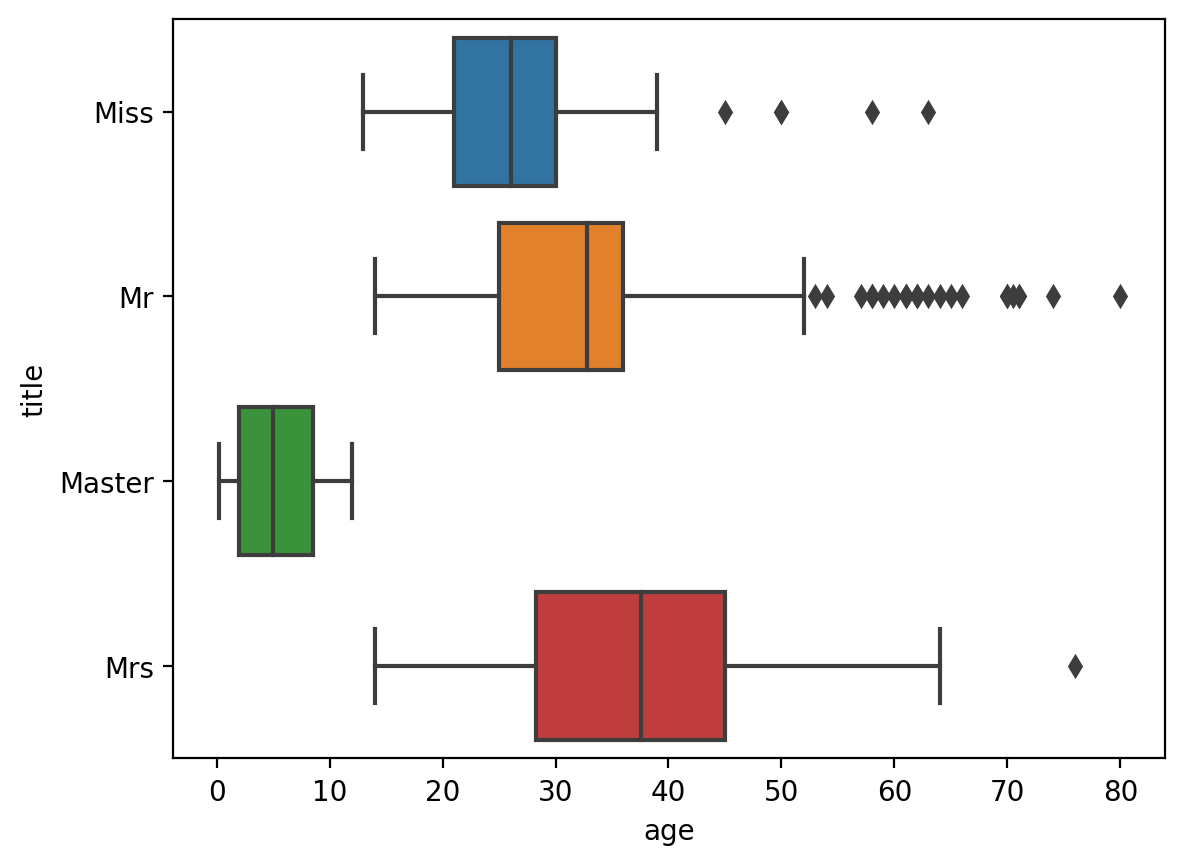

In [ ]:
#title별 age
sns.boxplot(y='title',x='age',data=tr)

In [ ]:
tr[['title','age']].groupby('title').describe()

age                                                           
        count       mean        std    min    25%        50%   75%   max
title                                                                   
Master   43.0   4.953077   3.577395   0.17   2.00   4.953077   8.5  12.0
Miss    108.0  26.040230   8.278510  13.00  21.00  26.040230  30.0  63.0
Mr      384.0  32.796980  11.340559  14.00  25.00  32.796980  36.0  80.0
Mrs     106.0  37.545455  12.757750  14.00  28.25  37.545455  45.0  76.0

In [ ]:
#chg_master 삭제
del tr['chg_master']
del te['chg_master']
del raw_te['chg_master']

In [ ]:
tr.columns

Index(['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'title'],
      dtype='object')

In [ ]:
check_shape(tr,te,raw_te)

((641, 11), (275, 11), (393, 10))

<Axes: xlabel='title', ylabel='Probability'>

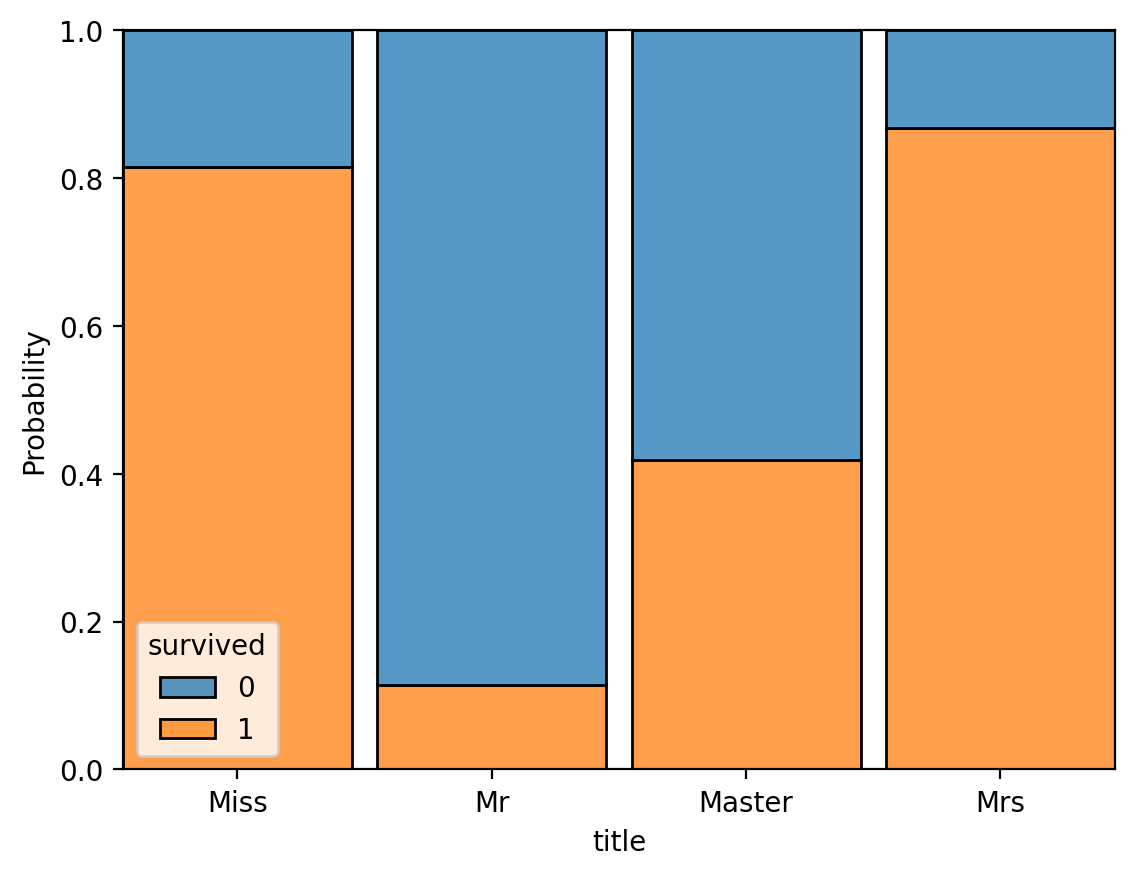

In [ ]:
sns.histplot(data=tr, hue='survived',x='title',stat='probability',
             multiple='fill',shrink=.9)

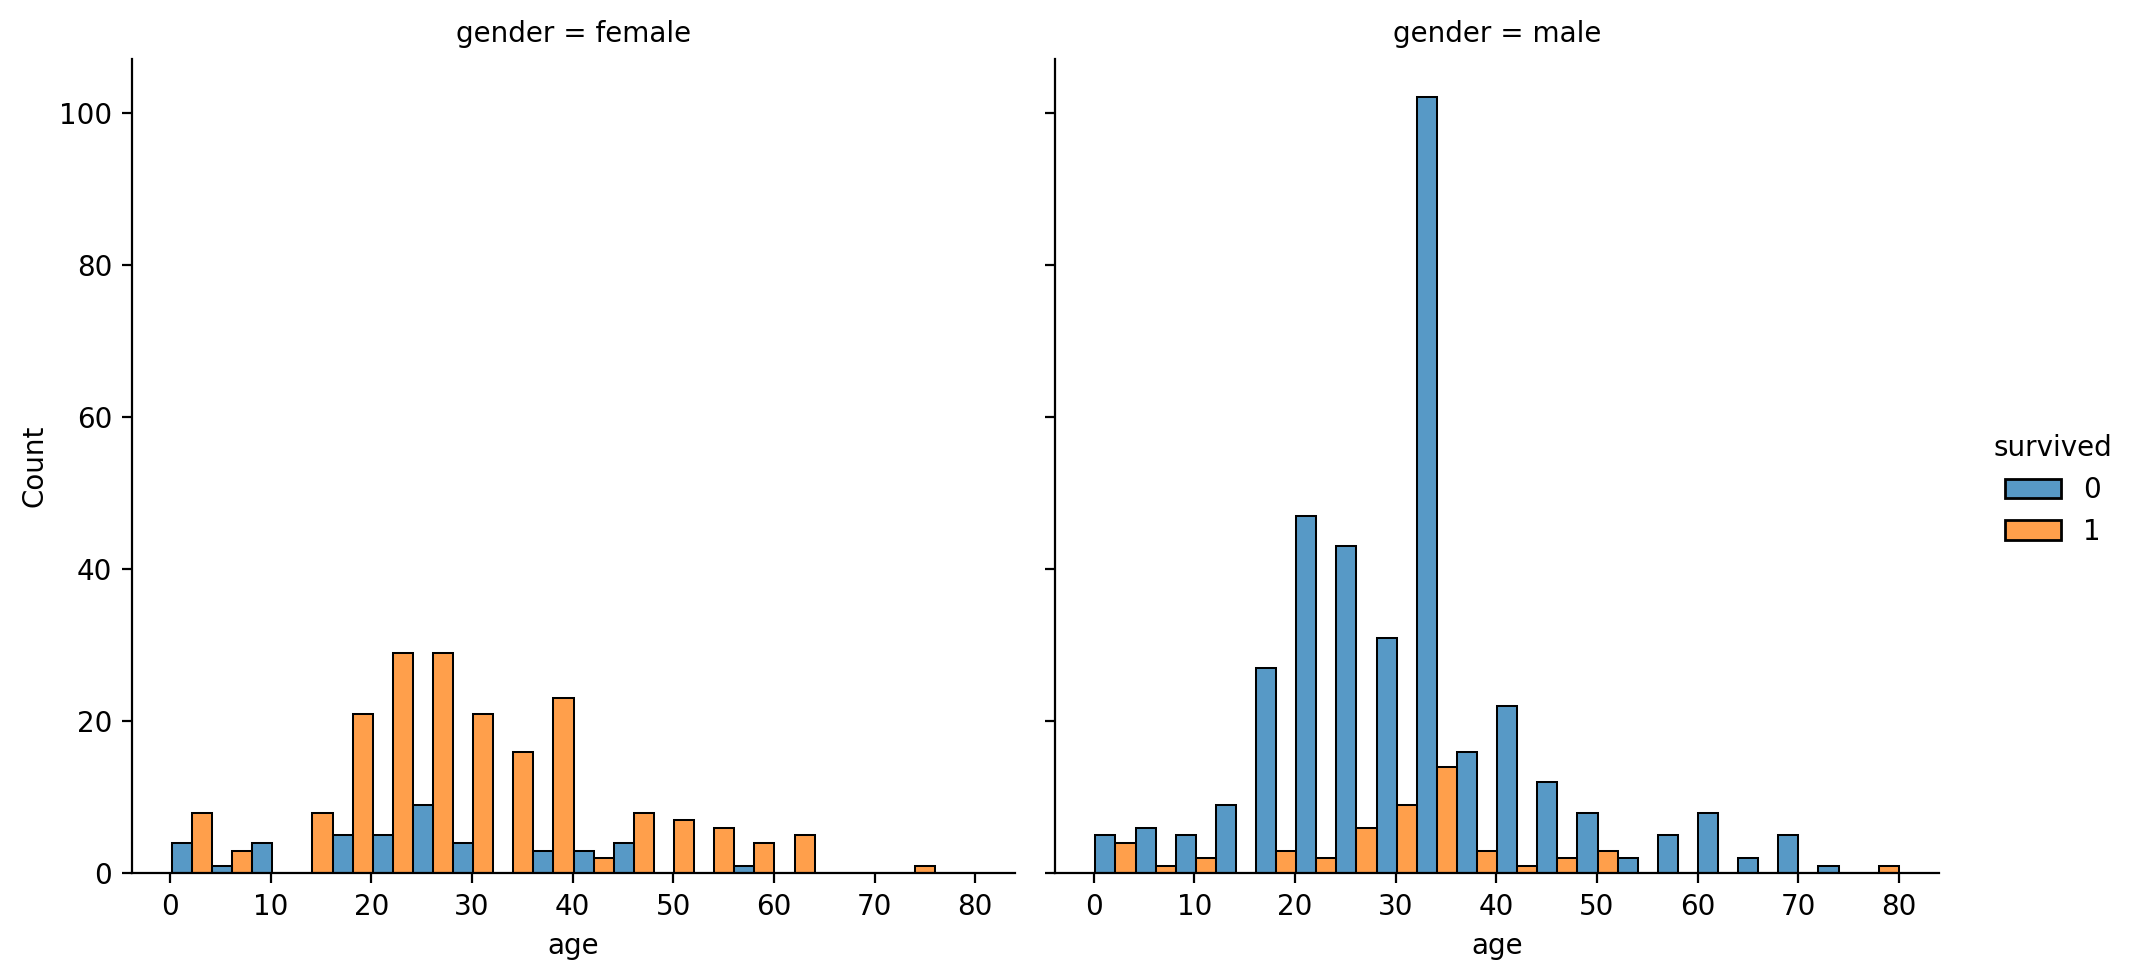

In [ ]:
sns.displot(tr, x='age', col='gender', hue='survived', multiple ='dodge', bins=20)
plt.show()

- child

In [ ]:
# def add_age_group(age):
#     try:
#         age_group = None
#         if age < 12:
#             age_group = 0 #어린이
#         elif age < 25:
#             age_group = 1 #청소년
#         elif age < 40:
#             age_group = 2 #청년
#         elif age < 65:
#             age_group = 3 #중장년     
#         else:
#             age_group = 4 #어르신
#         return age_group
#     except:
#         ERROR

In [ ]:
# tr['age_group'] = tr.apply(lambda row: add_age_group(row['age']),axis=1)
# te['age_group'] = te.apply(lambda row: add_age_group(row['age']),axis=1)
# raw_te['age_group'] = raw_te.apply(lambda row: add_age_group(row['age']),axis=1)

# tr['age_group']

In [ ]:
def add_child(age):
    try:
        child = None
        if age <= 12:
            child = 1
        else:
            child = 0
        return child
    except:
        ERROR

In [ ]:
tr['child'] = tr.apply(lambda row: add_child(row['age']),axis=1)
te['child'] = te.apply(lambda row: add_child(row['age']),axis=1)
raw_te['child'] = raw_te.apply(lambda row: add_child(row['age']),axis=1)

tr['child'].value_counts()

0    598
1     43
Name: child, dtype: int64

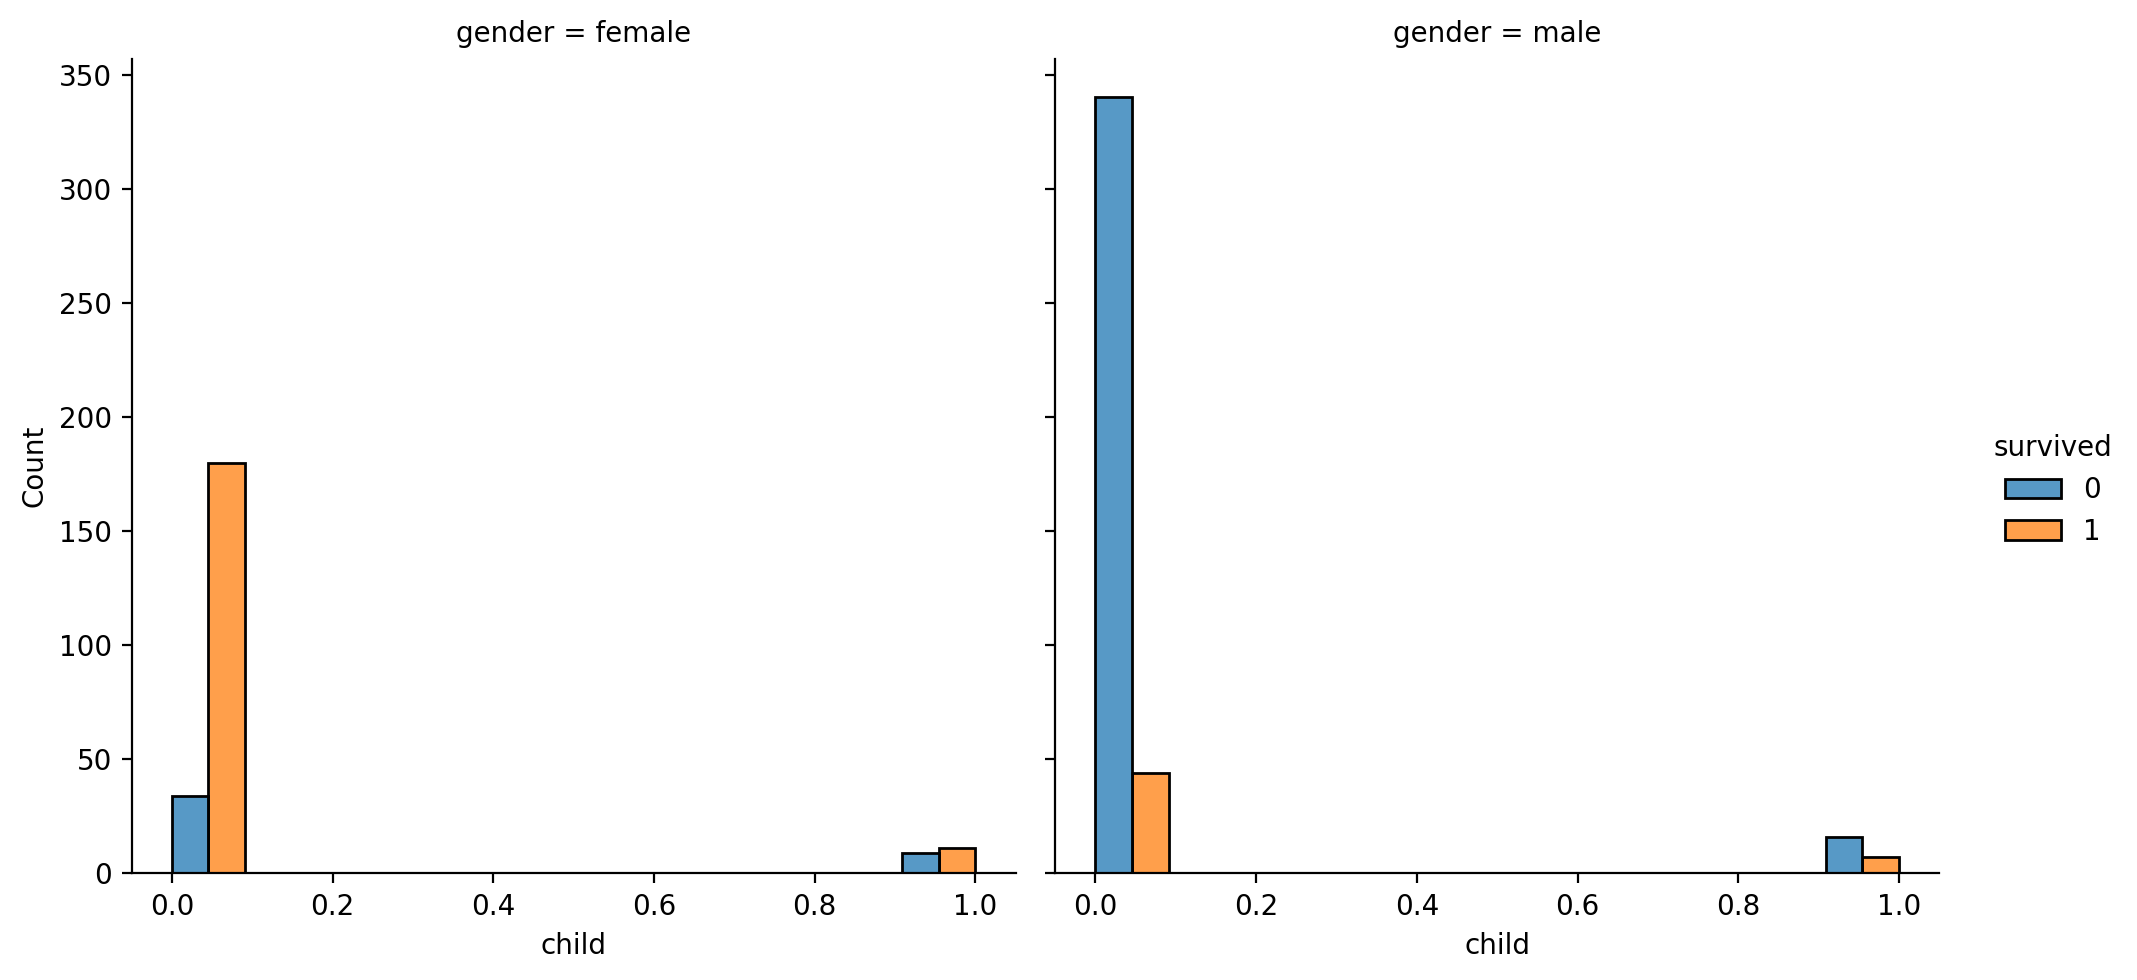

In [ ]:
#gender별 child 생존율
sns.displot(tr, x='child', col='gender', hue='survived',multiple='dodge')
plt.show()

In [ ]:
tr[['child','survived','gender']].groupby(by=['gender','child',]).mean()

survived
gender child          
female 0      0.841121
       1      0.550000
male   0      0.114583
       1      0.304348

- 여성의 경우에는 아이들보다 어른들의 생존율이 더 높다
- 남성의 경우에는 아이들의 생존율이 더 높다
- 하지만 아이들 중에서도 남자 아이들이 여자 아이들보다 생존율이 낮다

In [ ]:
def add_male_child(gender,child):
    ''' 
    남자 아이들 
    '''
    try:
        male_child = 0
        if (gender == 'male') & (child == 1) :
            male_child = 1
        else:
            male_child = male_child
        return male_child
    except:
        ERROR

In [ ]:
tr['male_child'] = tr.apply(lambda x : add_male_child(x['gender'],x['child']),axis =1)
te['male_child'] = te.apply(lambda x : add_male_child(x['gender'],x['child']),axis =1)
raw_te['male_child'] = raw_te.apply(lambda x : add_male_child(x['gender'],x['child']),axis =1)

tr[['child','gender','male_child']]

,child,gender,male_child
812,0,female,0
134,0,male,0
390,0,male,0
305,1,male,1
203,0,male,0
...,...,...,...
273,0,female,0
343,0,female,0
450,0,male,0
94,1,male,1


- 연령대별로 범주화

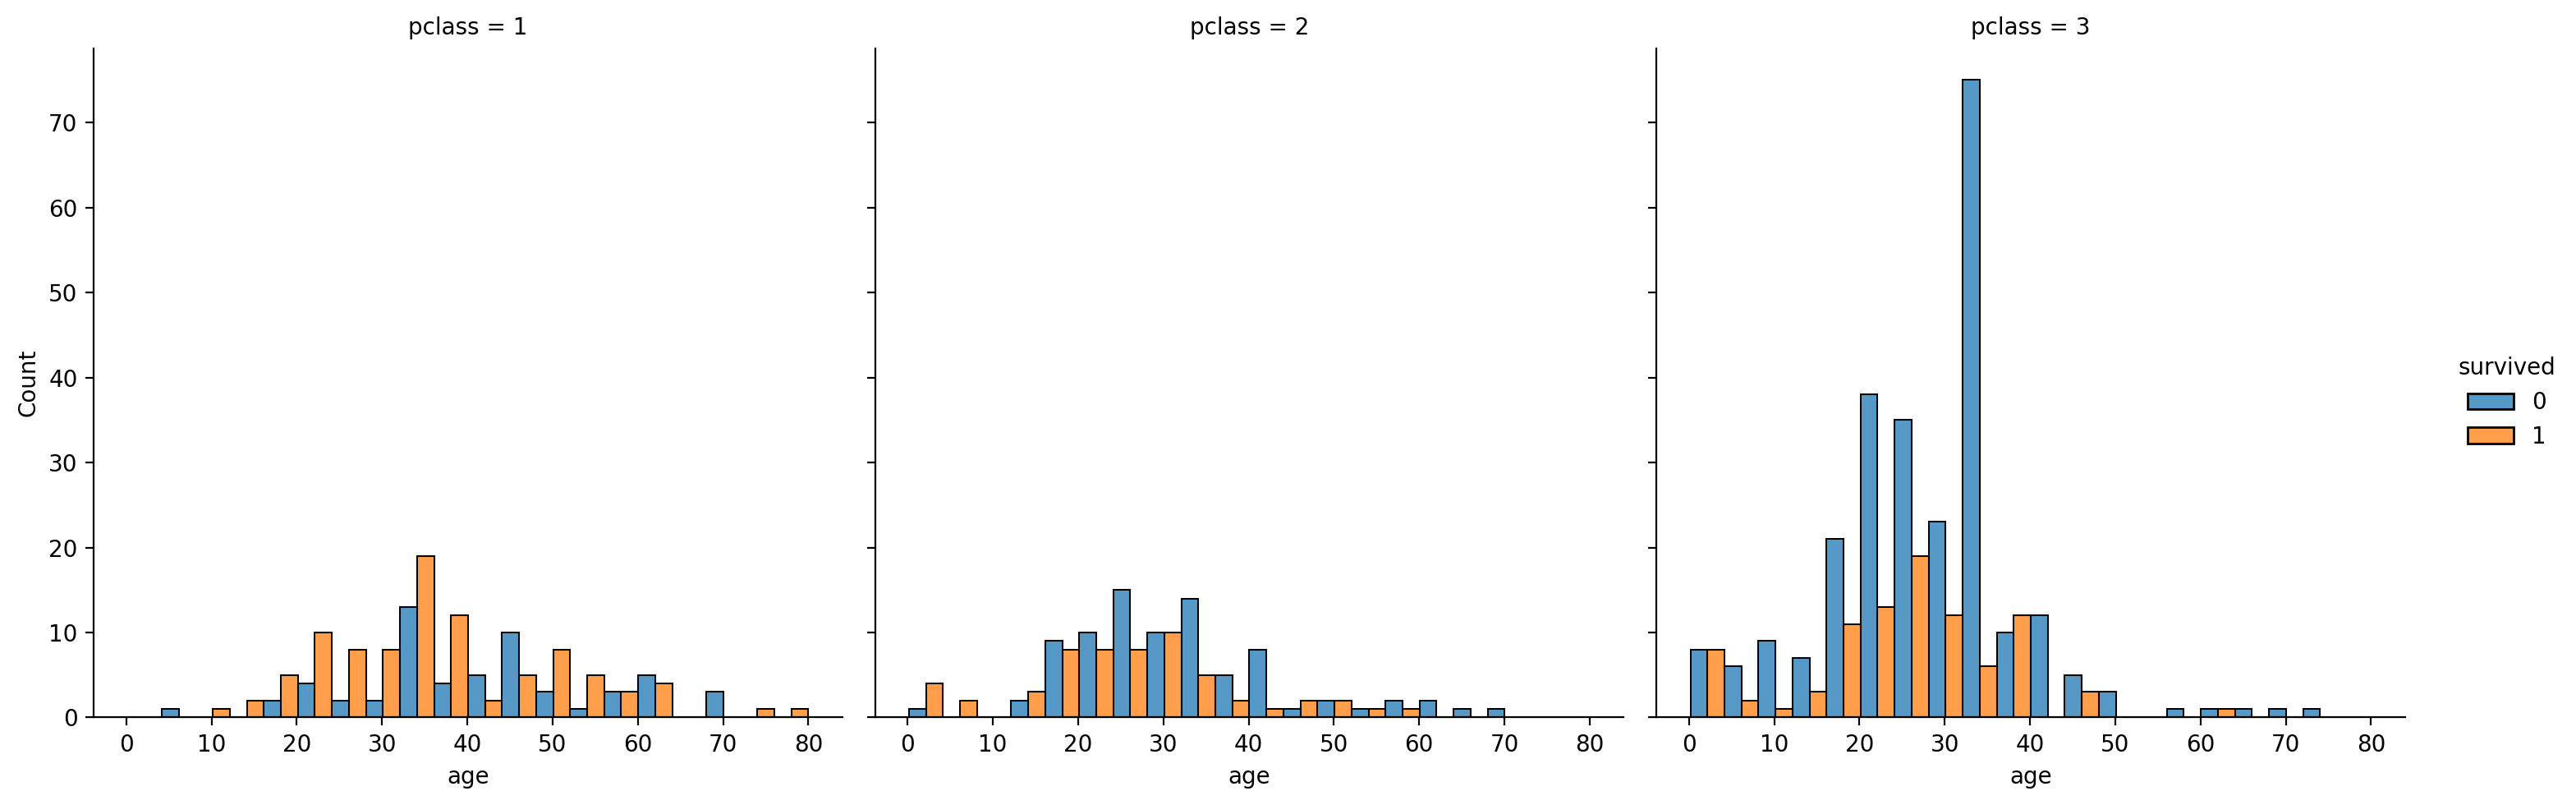

In [ ]:
sns.displot(data=tr, x='age', col='pclass',hue='survived',multiple='dodge',bins=20)

In [ ]:
tr.loc[tr.pclass == 1,['age','survived']].sort_values('age')

,age,survived
263,6.0,0
738,11.0,1
249,14.0,1
841,15.0,1
749,17.0,0
...,...,...
636,70.0,0
790,71.0,0
350,71.0,0
875,76.0,1


In [ ]:
tr[['pclass','age','survived']].groupby(by='age').describe()

pclass                                    survived                      \
       count mean  std  min  25%  50%  75%  max    count mean       std  min   
age                                                                            
0.17     1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0      1.0  1.0       NaN  1.0   
0.67     1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0      1.0  1.0       NaN  1.0   
0.75     2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0      2.0  0.5  0.707107  0.0   
0.83     1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0      1.0  1.0       NaN  1.0   
1.00     5.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0      5.0  1.0  0.000000  1.0   
...      ...  ...  ...  ...  ...  ...  ...  ...      ...  ...       ...  ...   
70.50    1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0      1.0  0.0       NaN  0.0   
71.00    2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.0  0.000000  0.0   
74.00    1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0      1.0  0.0       NaN  0.0   
76.00    1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.0       NaN  1.0   
80.00    1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.0       NaN  1.0   

                             
        25%  50%   75%  max  
age                          
0.17   1.00  1.0  1.00  1.0  
0.67   1.00  1.0  1.00  1.0  
0.75   0.25  0.5  0.75  1.0  
0.83   1.00  1.0  1.00  1.0  
1.00   1.00  1.0  1.00  1.0  
...     ...  ...   ...  ...  
70.50  0.00  0.0  0.00  0.0  
71.00  0.00  0.0  0.00  0.0  
74.00  0.00  0.0  0.00  0.0  
76.00  1.00  1.0  1.00  1.0  
80.00  1.00  1.0  1.00  1.0  

[91 rows x 16 columns]

In [ ]:
tr[['pclass','age','survived']].groupby(by='pclass').describe()

age                                                          \
        count       mean        std   min   25%   50%       75%   max   
pclass                                                                  
1       152.0  38.848825  14.148078  6.00  30.0  36.0  48.00000  80.0   
2       141.0  29.913954  12.788568  0.67  23.0  29.0  36.00000  70.0   
3       348.0  27.230738  11.290272  0.17  21.0  27.0  32.79698  74.0   

       survived                                               
          count      mean       std  min  25%  50%  75%  max  
pclass                                                        
1         152.0  0.618421  0.487380  0.0  0.0  1.0  1.0  1.0  
2         141.0  0.404255  0.492497  0.0  0.0  0.0  1.0  1.0  
3         348.0  0.261494  0.440081  0.0  0.0  0.0  1.0  1.0

<Axes: xlabel='pclass', ylabel='age'>

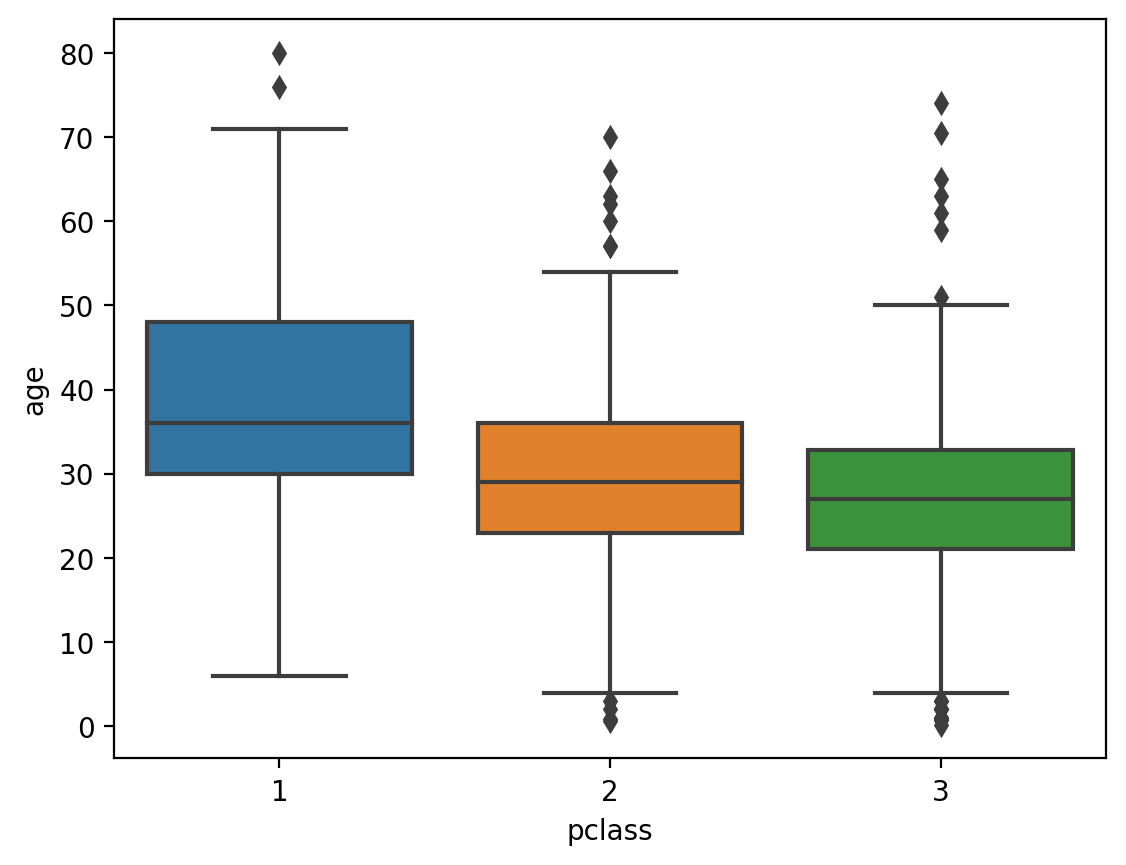

In [ ]:
sns.boxplot(data=tr, x='pclass',y='age')

In [ ]:
for i in range(4,11):
  tr['age_band'] = pd.cut(tr['age'],i)
  print(tr[['age_band','survived']].groupby('age_band').agg(['mean','sum','count']))
  

                  survived           
                      mean  sum count
age_band                             
(0.0902, 20.128]  0.431034   50   116
(20.128, 40.085]  0.368932  152   412
(40.085, 60.043]  0.366667   33    90
(60.043, 80.0]    0.304348    7    23
                  survived           
                      mean  sum count
age_band                             
(0.0902, 16.136]  0.433333   26    60
(16.136, 32.102]  0.412371  120   291
(32.102, 48.068]  0.298701   69   231
(48.068, 64.034]  0.510204   25    49
(64.034, 80.0]    0.200000    2    10
                  survived          
                      mean sum count
age_band                            
(0.0902, 13.475]  0.431818  19    44
(13.475, 26.78]   0.396226  84   212
(26.78, 40.085]   0.363971  99   272
(40.085, 53.39]   0.333333  25    75
(53.39, 66.695]   0.433333  13    30
(66.695, 80.0]    0.250000   2     8
                  survived          
                      mean sum count
age_band               

10개의 범주로 나눈 경우가 생존율 차이가 크게 크게 나타나므로 age를 10개의 범주로 나누도록 하겠다.
for문 내에서 10개로 나눈 경우가 마지막이라서 age_band는 10개로 범주화 된 상태이다.

In [ ]:
tr['age_band'].value_counts()

(32.102, 40.085]    177
(24.119, 32.102]    152
(16.136, 24.119]    139
(40.085, 48.068]     54
(0.0902, 8.153]      32
(8.153, 16.136]      28
(48.068, 56.051]     26
(56.051, 64.034]     23
(64.034, 72.017]      7
(72.017, 80.0]        3
Name: age_band, dtype: int64

In [ ]:
tr[['age','age_band']]  #확인

,age,age_band
812,22.0,"(16.136, 24.119]"
134,21.0,"(16.136, 24.119]"
390,32.0,"(24.119, 32.102]"
305,11.0,"(8.153, 16.136]"
203,30.0,"(24.119, 32.102]"
...,...,...
273,28.0,"(24.119, 32.102]"
343,24.0,"(16.136, 24.119]"
450,42.0,"(40.085, 48.068]"
94,2.0,"(0.0902, 8.153]"


In [ ]:
tr['age_band'].unique()

[(16.136, 24.119], (24.119, 32.102], (8.153, 16.136], (48.068, 56.051], (32.102, 40.085], (40.085, 48.068], (0.0902, 8.153], (56.051, 64.034], (72.017, 80.0], (64.034, 72.017]]
Categories (10, interval[float64, right]): [(0.0902, 8.153] < (8.153, 16.136] < (16.136, 24.119] <
                                            (24.119, 32.102] ... (48.068, 56.051] <
                                            (56.051, 64.034] < (64.034, 72.017] < (72.017, 80.0]]

In [ ]:
len(tr['age_band'].unique())

10

In [ ]:
tr['age_band'].unique()[0].right

24.119

In [ ]:
#age interval 끝값 출력
result=[]
for i in range(len(tr['age_band'].unique())):
  r = tr['age_band'].unique()[i].right.astype('int')
  result.append(r)

result = sorted(result,reverse=True)

In [ ]:
result[0]

80

In [ ]:
#age를 범주형으로 변환
combine = [tr, te , raw_te]

for dataset in combine:    
    dataset.loc[ dataset['age'] <= 8, 'age'] = 0
    dataset.loc[(dataset['age'] > 8) & (dataset['age'] <= 16), 'age'] = 1
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 24), 'age'] = 2
    dataset.loc[(dataset['age'] > 24) & (dataset['age'] <= 32), 'age'] = 3
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 40), 'age'] = 4
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 48), 'age'] = 5
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 56), 'age'] = 6
    dataset.loc[(dataset['age'] > 56) & (dataset['age'] <= 64), 'age'] = 7
    dataset.loc[(dataset['age'] > 64) & (dataset['age'] <= 72), 'age'] = 8
    dataset.loc[(dataset['age'] > 72) & (dataset['age'] <= 80), 'age'] = 9
    dataset.loc[ dataset['age'] > 80, 'age'] = 10
tr.head()

,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title,child,male_child,age_band
812,1,3,female,2.0,0,0,347085,7.7750,NaN,S,Miss,0,0,"(16.136, 24.119]"
134,0,3,male,2.0,0,0,330920,7.8208,NaN,Q,Mr,0,0,"(16.136, 24.119]"
390,1,3,male,3.0,0,0,350417,7.8542,NaN,S,Mr,0,0,"(24.119, 32.102]"
305,0,3,male,1.0,0,0,2699,18.7875,NaN,C,Master,1,1,"(8.153, 16.136]"
203,0,3,male,3.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,Mr,0,0,"(24.119, 32.102]"


In [ ]:
#age type 변경
tr['age']=tr.age.astype('int64')
te['age']=te.age.astype('int64')
raw_te['age']=raw_te.age.astype('int64')
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    641 non-null    int64   
 1   pclass      641 non-null    int64   
 2   gender      641 non-null    object  
 3   age         641 non-null    int64   
 4   sibsp       641 non-null    int64   
 5   parch       641 non-null    int64   
 6   ticket      641 non-null    object  
 7   fare        641 non-null    float64 
 8   cabin       135 non-null    object  
 9   embarked    641 non-null    object  
 10  title       641 non-null    object  
 11  child       641 non-null    int64   
 12  male_child  641 non-null    int64   
 13  age_band    641 non-null    category
dtypes: category(1), float64(1), int64(7), object(5)
memory usage: 87.3+ KB


In [ ]:
tr[['age','age_band']]  #확인

,age,age_band
812,2,"(16.136, 24.119]"
134,2,"(16.136, 24.119]"
390,3,"(24.119, 32.102]"
305,1,"(8.153, 16.136]"
203,3,"(24.119, 32.102]"
...,...,...
273,3,"(24.119, 32.102]"
343,2,"(16.136, 24.119]"
450,5,"(40.085, 48.068]"
94,0,"(0.0902, 8.153]"


In [ ]:
# age_band 삭제
del tr['age_band']

In [ ]:
tr[['child','survived','pclass']].groupby(by=['pclass','child',]).mean()

survived
pclass child          
1      0      0.620000
       1      0.500000
2      0      0.380597
       1      0.857143
3      0      0.254777
       1      0.323529

In [ ]:
tr[['child','survived','gender']].groupby(by=['gender','child',]).mean()

survived
gender child          
female 0      0.841121
       1      0.550000
male   0      0.114583
       1      0.304348

In [ ]:
tr[['child','survived','pclass','gender']].groupby(by=['pclass','gender','child',]).agg(['mean','count'])

survived      
                         mean count
pclass gender child                
1      female 0      0.986111    72
       male   0      0.282051    78
              1      0.500000     2
2      female 0      0.924528    53
              1      1.000000     3
       male   0      0.024691    81
              1      0.750000     4
3      female 0      0.674157    89
              1      0.470588    17
       male   0      0.088889   225
              1      0.176471    17

pclass2 내에서 어린아이와 어른의 생존율 차이가 많이 난다 
- pclass 와 child로 구분 했을 때보다 gender별로 한번더 구분 해주었을떄 pclass2에서 male 내에서 더 심하게 차이가 남
- pclass2의 어린아이가 아닌 남성과 pclass3의 남성 탑승객의 생존율이 매우 낮음

In [ ]:
# # pclass_gender_child 합치기 
# tr['pclass_gender_child'] = tr.apply(lambda x : str(x['pclass']) + '_' + x['gender'] + '_' + str(x['child']),axis=1)
# tr[['pclass','gender','child','pclass_gender_child']]

In [ ]:
# for df in [te, raw_te]:
#     df['pclass_gender_child'] = df.apply(lambda x : str(x['pclass']) + '_' + x['gender'] + '_' + str(x['child']),axis=1)

In [ ]:
# check_shape(tr,te,raw_te)

In [ ]:
#pclass_gender 함치기
tr['gender_pclass']=tr.apply(lambda x : x['gender']+ '_' +str(x['pclass']),axis=1)
tr[['pclass','gender','gender_pclass']]


,pclass,gender,gender_pclass
812,3,female,female_3
134,3,male,male_3
390,3,male,male_3
305,3,male,male_3
203,3,male,male_3
...,...,...,...
273,2,female,female_2
343,3,female,female_3
450,1,male,male_1
94,3,male,male_3


In [ ]:
for df in [te, raw_te]:
    df['gender_pclass']=df.apply(lambda x : x['gender']+ '_' +str(x['pclass']),axis=1)

In [ ]:
check_shape(tr,te,raw_te)

((641, 14), (275, 14), (393, 13))

In [ ]:
# pclass2에서 child가 아닌 남성 탑승객과, pclass3에서 남성 탑승객들
def add_male_23(gender_pclass,child):
    try:
        male_23 = None
        if (gender_pclass == 'male_2') & (child == 0) | (gender_pclass == 'male_3'):
            male_23 = 1
        else:
            male_23 = 0
        return male_23
    except:
        ERROR
        

In [ ]:
tr['male_23'] = tr.apply(lambda x : add_male_23(x['gender_pclass'],x['child']),axis =1)

In [ ]:
for df in [te, raw_te]:
    df['male_23'] = df.apply(lambda x : add_male_23(x['gender_pclass'],x['child']),axis =1)

In [ ]:
tr.loc[(tr.gender_pclass == 'male_2') & (tr.child == 0) | (tr.gender_pclass == 'male_3')]['survived'].count(),tr['male_23'].sum()

(323, 323)

In [ ]:
check_shape(tr,te,raw_te)

((641, 15), (275, 15), (393, 14))

##### sibsp

 FamilySize 
- parch와 sibsp 이용

In [ ]:
print(f'before: {tr.shape , te.shape , raw_te.shape}')
combine=[tr,te,raw_te]

for dataset in combine:
    dataset['FamilySize'] = dataset['parch'] + dataset['sibsp'] + 1 

tr[['FamilySize','survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='survived',ascending=False)

print(f'after: {tr.shape , te.shape , raw_te.shape}')

before: ((641, 15), (275, 15), (393, 14))
after: ((641, 16), (275, 16), (393, 15))


 IsAlone

- 1인가구인지?

In [ ]:
print(f'before: {tr.shape , te.shape , raw_te.shape}')

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone']=1

print(f'after: {tr.shape , te.shape , raw_te.shape}')

before: ((641, 16), (275, 16), (393, 15))
after: ((641, 17), (275, 17), (393, 16))


In [ ]:
tr[['IsAlone','survived']].groupby(['IsAlone'],as_index=False).agg(['mean','count'])

survived      
             mean count
IsAlone                
0        0.504132   242
1        0.300752   399

In [ ]:
tr[['age','sibsp','survived']].groupby(by ='sibsp',as_index=False).agg(['mean','min','max','count'])

age                survived              
           mean min max count      mean min max count
sibsp                                                
0      3.457014   0   9   442  0.330317   0   1   442
1      3.454545   0   9   154  0.558442   0   1   154
2      2.526316   0   6    19  0.421053   0   1    19
3      1.636364   0   3    11  0.090909   0   1    11
4      0.400000   0   1    10  0.100000   0   1    10
5      1.000000   1   1     2  0.000000   0   0     2
8      2.666667   0   4     3  0.000000   0   0     3

- 0: (0.0902, 8.153]   
- 1: (8.153, 16.136]   
- 2: (16.136, 24.119]  
- 3: (24.119, 32.102]  
- 4: (32.102, 40.085]  
- 5: (40.085, 48.068]  
- 6: (48.068, 56.051]  
- 7: (56.051, 64.034]  
- 8: (64.034, 72.017]  
- 9: (72.017, 80.0]    





<Axes: xlabel='sibsp', ylabel='age'>

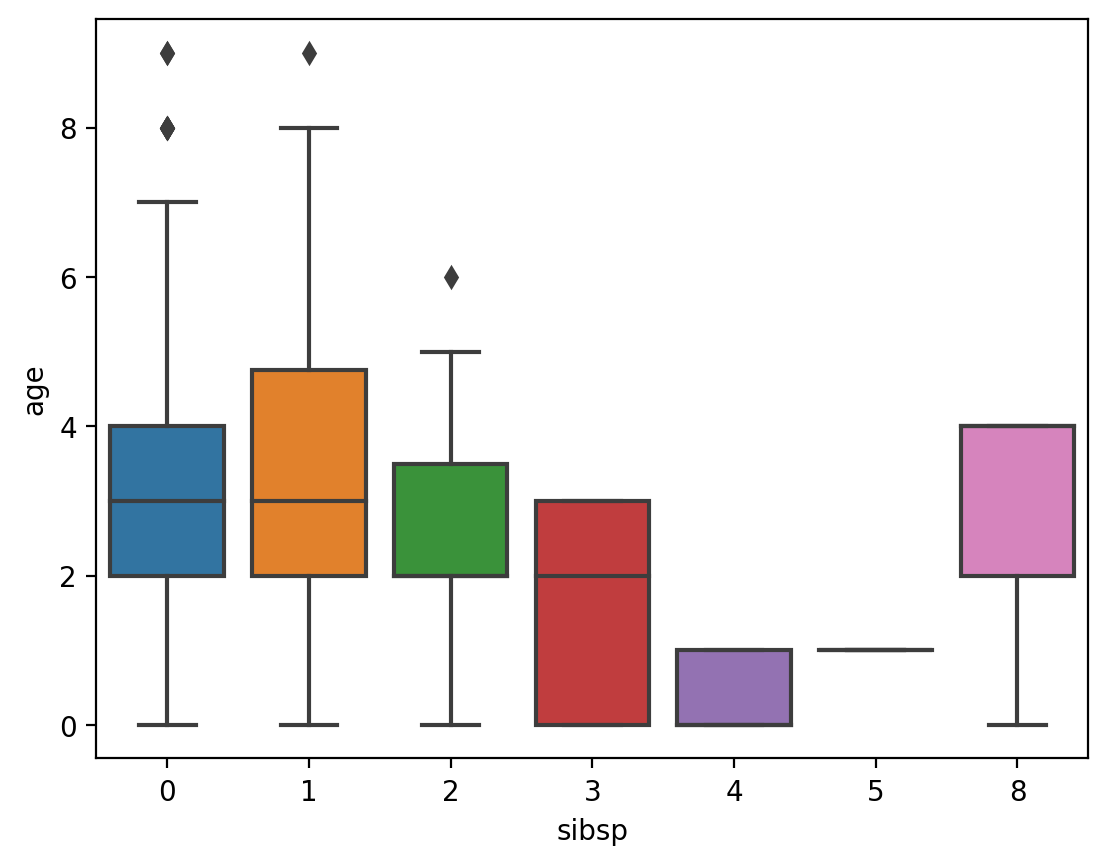

In [ ]:
sns.boxplot(x='sibsp',y='age',data=tr)

sibsp가 3이상인 경우에 대부분 age가 0~1인 어린아이들인데 생존율이 굉장히 낮다.


In [ ]:
tr[['sibsp','pclass','survived']].groupby(by ='sibsp',as_index=False).agg(['mean','min','max','count'])

pclass                survived              
           mean min max count      mean min max count
sibsp                                                
0      2.375566   1   3   442  0.330317   0   1   442
1      2.006494   1   3   154  0.558442   0   1   154
2      2.368421   1   3    19  0.421053   0   1    19
3      2.636364   1   3    11  0.090909   0   1    11
4      3.000000   3   3    10  0.100000   0   1    10
5      3.000000   3   3     2  0.000000   0   0     2
8      3.000000   3   3     3  0.000000   0   0     3

pclass와 함께 살펴본 결과 sibsp 4이상인 탑승객은 모두 3등실이었다.

- 결론적으로 sibsp >= 3인 탑승객의 생존율이 낮기 때문에 새로운 feature를 생성


In [ ]:
def add_multi_sibsp(sibsp):
  try:
    multi_sibsp = None
    if sibsp >= 3:
      multi_sibsp = 1
    else:
      multi_sibsp = 0
    return multi_sibsp
  except:
    ERROR

In [ ]:
tr['multi_sibsp'] = tr.apply(lambda x : add_multi_sibsp(x['sibsp']),axis=1)
tr.loc[tr['sibsp']>=3,'multi_sibsp']

265    1
126    1
626    1
46     1
647    1
330    1
466    1
464    1
713    1
583    1
754    1
261    1
111    1
643    1
90     1
837    1
639    1
822    1
286    1
890    1
160    1
660    1
362    1
365    1
481    1
94     1
Name: multi_sibsp, dtype: int64

In [ ]:
for df in [te, raw_te]:
    df['multi_sibsp'] =df.apply(lambda x : add_multi_sibsp(x['sibsp']),axis=1)

In [ ]:
check_shape(tr,te,raw_te)

((641, 18), (275, 18), (393, 17))

이제는 sibsp <=2 인 경우

In [ ]:
tr[['sibsp','pclass','survived']].groupby(by =['sibsp','pclass'],as_index=False).agg(['mean','min','max','count','sum']).iloc[:9]

survived                  
                  mean min max count sum
sibsp pclass                            
0     1       0.532609   0   1    92  49
      2       0.358696   0   1    92  33
      3       0.248062   0   1   258  64
1     1       0.759259   0   1    54  41
      2       0.488889   0   1    45  22
      3       0.418182   0   1    55  23
2     1       0.750000   0   1     4   3
      2       0.500000   0   1     4   2
      3       0.272727   0   1    11   3

In [ ]:
tr[['sibsp','embarked','survived']].groupby(by =['sibsp','embarked']).agg(['mean','min','max','count','sum']).iloc[:9]

survived                  
                    mean min max count sum
sibsp embarked                            
0     C         0.439024   0   1    82  36
      Q         0.450980   0   1    51  23
      S         0.281553   0   1   309  87
1     C         0.619048   0   1    42  26
      Q         0.500000   0   1     4   2
      S         0.537037   0   1   108  58
2     C         0.750000   0   1     4   3
      Q         0.500000   0   1     2   1
      S         0.307692   0   1    13   4

In [ ]:
sibsp_single = tr.loc[(tr['sibsp']> 0)&(tr['sibsp']<= 2)]

In [ ]:
sibsp_single[['sibsp','age','pclass','survived']].groupby(by =['sibsp','pclass','age']).agg(['mean','min','max','count','sum'])

survived                  
                      mean min max count sum
sibsp pclass age                            
1     1      1    1.000000   1   1     2   2
             2    0.833333   0   1     6   5
             3    0.714286   0   1     7   5
             4    0.928571   0   1    14  13
             5    0.444444   0   1     9   4
             6    0.777778   0   1     9   7
             7    0.800000   0   1     5   4
             8    0.000000   0   0     1   0
             9    1.000000   1   1     1   1
      2      0    0.750000   0   1     4   3
             1    1.000000   1   1     1   1
             2    0.833333   0   1     6   5
             3    0.437500   0   1    16   7
             4    0.250000   0   1     8   2
             5    0.400000   0   1     5   2
             6    0.333333   0   1     3   1
             7    0.500000   0   1     2   1
      3      0    0.700000   0   1    10   7
             1    0.400000   0   1     5   2
             2    0.625000   0   1     8   5
             3    0.230769   0   1    13   3
             4    0.333333   0   1    15   5
             5    0.250000   0   1     4   1
2     1      2    1.000000   1   1     2   2
             5    0.000000   0   0     1   0
             6    1.000000   1   1     1   1
      2      2    0.500000   0   1     4   2
      3      0    1.000000   1   1     1   1
             1    0.000000   0   0     2   0
             2    0.250000   0   1     4   1
             3    0.000000   0   0     1   0
             4    0.333333   0   1     3   1

- pclass가 embarked보다 생존율 차이가 두드러지기 때문에 pclass로 구분
- sibsp 1~2 이고 pclass 1인 탑승객의 생존율이 놓다
- pclass 1인 경우에는 나이별로도 모두 생존율이 높다

In [ ]:
def add_single_sibsp(sibsp,pclass):
  '''
  sibsp가 1,2이고 1등실 탑승객
  '''
  try:
    single_sibsp = None
    if (sibsp == 1) | (sibsp == 2):
      if pclass == 1:
        single_sibsp = 1
      else:
        single_sibsp = 0 
    else:
      single_sibsp = 0 

    return single_sibsp
  except:
    ERROR


In [ ]:
tr['single_sibsp'] = tr.apply(lambda x : add_single_sibsp(x['sibsp'],x['pclass']),axis=1)

In [ ]:
tr.loc[tr.single_sibsp==1,['sibsp','pclass','single_sibsp']].value_counts()

sibsp  pclass  single_sibsp
1      1       1               54
2      1       1                4
dtype: int64

In [ ]:
for df in [te, raw_te]:
  df['single_sibsp'] = df.apply(lambda x : add_single_sibsp(x['sibsp'],x['pclass']),axis=1)

In [ ]:
check_shape(tr,te,raw_te)

((641, 19), (275, 19), (393, 18))

#### parch

In [ ]:
tr['parch']

812    0
134    0
390    0
305    0
203    0
      ..
273    0
343    0
450    0
94     1
277    0
Name: parch, Length: 641, dtype: int64

#### embarked 
- missing data : 최빈값으로 대체

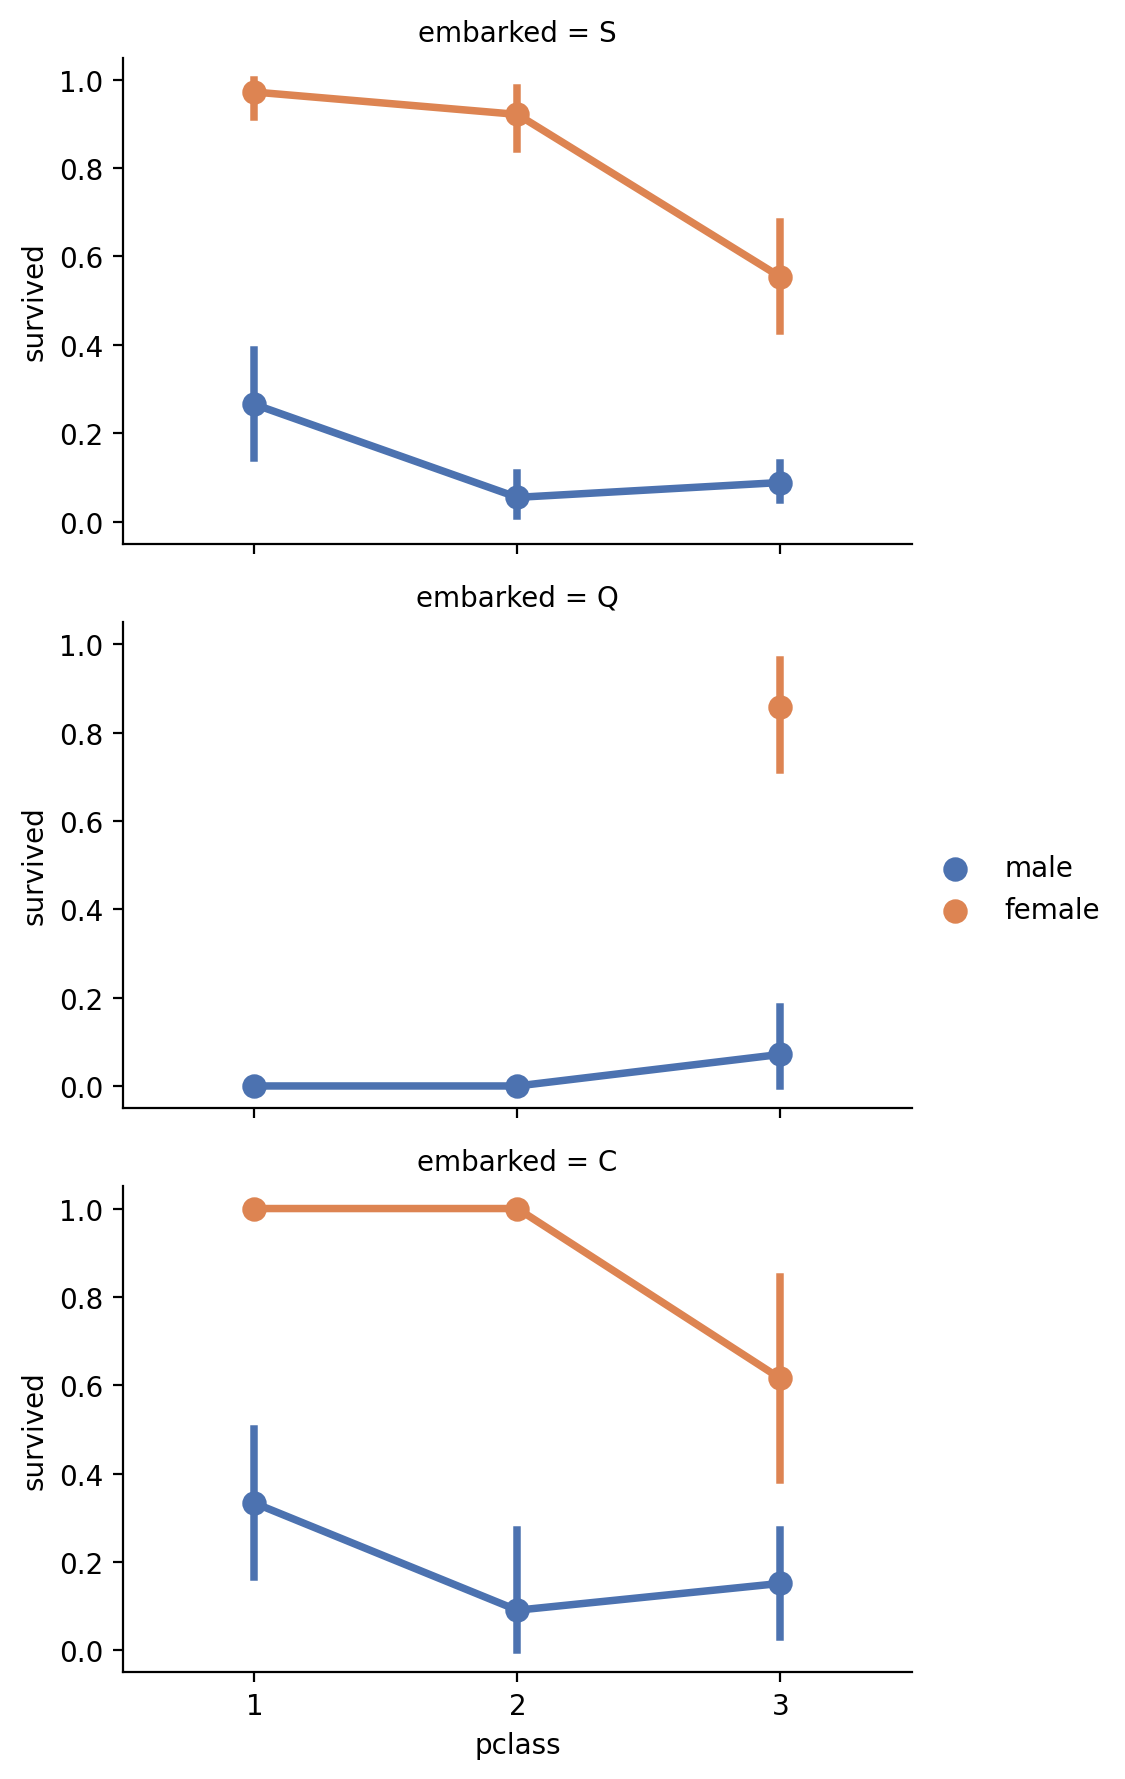

In [ ]:
#embarked
grid = sns.FacetGrid(train, row='embarked',  aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'gender', palette='deep',order=[1,2,3], hue_order=["male","female"])
grid.add_legend()

plt.show()

In [ ]:
tr[['embarked','fare','survived']].groupby(by='embarked').agg(['mean','count','min','max'])

fare                          survived              
               mean count     min       max      mean count min max
embarked                                                           
C         61.320281   128  6.4375  512.3292  0.507812   128   0   1
Q         11.383191    58  6.7500   90.0000  0.448276    58   0   1
S         25.892920   455  0.0000  263.0000  0.331868   455   0   1

In [ ]:
tr.embarked.isnull().sum() , te.embarked.isnull().sum(), raw_te.embarked.isnull().sum()

(0, 1, 1)

In [ ]:
tr.embarked.value_counts()

S    455
C    128
Q     58
Name: embarked, dtype: int64

In [ ]:
tr.embarked.mode().values[0]

'S'

In [ ]:
# embarked 결측치는 최빈값으로 대체
te['embarked'].fillna(tr.embarked.mode().values[0],inplace = True)
raw_te['embarked'].fillna(tr.embarked.mode().values[0],inplace = True)

In [ ]:
tr.embarked.isnull().sum() , te.embarked.isnull().sum(), raw_te.embarked.isnull().sum()

(0, 0, 0)

#### fare
- missing data : 중앙값으로 대체

In [ ]:
tr.fare.isnull().sum() , te.fare.isnull().sum(), raw_te.fare.isnull().sum()

(0, 0, 1)

In [ ]:
#중앙값으로 대체
raw_te['fare'].fillna(tr['fare'].median(),inplace=True)

In [ ]:
tr.fare.isnull().sum() , te.fare.isnull().sum(), raw_te.fare.isnull().sum()

(0, 0, 0)

In [ ]:
tr['fare'].describe()

count    641.000000
mean      31.654446
std       49.827609
min        0.000000
25%        7.895800
50%       14.400000
75%       30.000000
max      512.329200
Name: fare, dtype: float64

<Axes: ylabel='fare'>

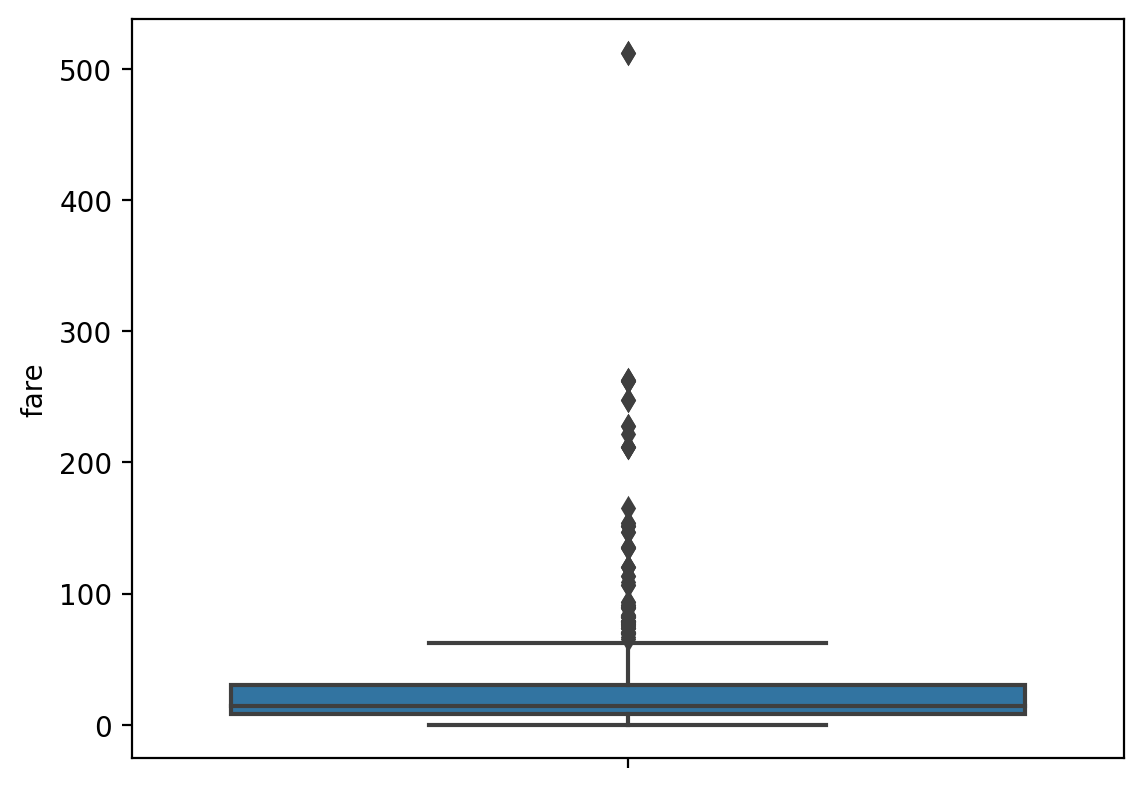

In [ ]:
sns.boxplot(y='fare',data=tr)

In [ ]:
def outlier(data):
    ''' 이상치 계산 함수'''
    quantile =  data.quantile([0.25,0.75])
    iqr = quantile.values[1]-quantile.values[0]
    Upper_boundary = quantile.values[1] + 1.5*iqr
    Lower_boundary = quantile.values[0] - 1.5*iqr
    return Lower_boundary,Upper_boundary

In [ ]:
outlier(tr['fare'])[1]  #fare의 이상치 ->약 63이상

63.1563

In [ ]:
def add_rich(fare):
    ''' 탑승객 중 부유층 구별 함수'''
    try:
        rich = None
        if fare >= outlier(tr['fare'])[1] :
            rich = 1
        else :
            rich = 0
        return rich
    except:
        return ERROR

In [ ]:
tr['rich'] = tr.apply(lambda row: add_rich(row['fare']),axis=1)
te['rich'] = te.apply(lambda row: add_rich(row['fare']),axis=1)
raw_te['rich'] = raw_te.apply(lambda row: add_rich(row['fare']),axis=1)

tr['rich'].value_counts()

0    561
1     80
Name: rich, dtype: int64

In [ ]:
def add_poor(fare):
    ''' 탑승객 중 빈민층 구별 함수'''
    try:
        poor = None
        if fare >= tr['fare'].quantile(.25) :
            poor = 1
        else :
            poor = 0
        return poor
    except:
        return ERROR

In [ ]:
tr['poor'] = tr.apply(lambda row: add_poor(row['fare']),axis=1)
te['poor'] = te.apply(lambda row: add_poor(row['fare']),axis=1)
raw_te['poor'] = raw_te.apply(lambda row: add_poor(row['fare']),axis=1)

tr['poor'].value_counts()

1    492
0    149
Name: poor, dtype: int64

- fare 그룹화
> <= 26 / <=63 / 64 >=
>> fare의 이상치 기준

In [ ]:
outlier(tr['fare'])[1]

63.1563

In [ ]:
def add_fareBand(fare):
    try:
        fareBand = None
        if fare <= 26:
            fareBand = '하류'
        elif fare <= outlier(tr['fare'])[1]:
            fareBand = '중류'
        else:
            fareBand = '상류'
        return fareBand
    except:
        ERROR

In [ ]:
tr['fareBand'] = tr.apply(lambda row: add_fareBand(row['fare']),axis=1)
te['fareBand'] = te.apply(lambda row: add_fareBand(row['fare']),axis=1)
raw_te['fareBand'] = raw_te.apply(lambda row: add_fareBand(row['fare']),axis=1)

tr['fareBand'].value_counts()

하류    434
중류    127
상류     80
Name: fareBand, dtype: int64

In [ ]:
tr.head()

,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,...,male_child,gender_pclass,male_23,FamilySize,IsAlone,multi_sibsp,single_sibsp,rich,poor,fareBand
812,1,3,female,2,0,0,347085,7.7750,NaN,S,...,0,female_3,0,1,1,0,0,0,0,하류
134,0,3,male,2,0,0,330920,7.8208,NaN,Q,...,0,male_3,1,1,1,0,0,0,0,하류
390,1,3,male,3,0,0,350417,7.8542,NaN,S,...,0,male_3,1,1,1,0,0,0,0,하류
305,0,3,male,1,0,0,2699,18.7875,NaN,C,...,1,male_3,1,1,1,0,0,0,1,하류
203,0,3,male,3,0,0,SOTON/OQ 392090,8.0500,NaN,S,...,0,male_3,1,1,1,0,0,0,1,하류


In [ ]:
# del tr['rich']
# del te['rich']
# del raw_te['rich']

- fare 그룹화

In [ ]:
tr['new_fare'] = pd.cut(tr['fare'],4)
tr['new_fare'].value_counts()

(-0.512, 128.082]     613
(128.082, 256.165]     21
(256.165, 384.247]      5
(384.247, 512.329]      2
Name: new_fare, dtype: int64

In [ ]:
for df in [tr,te,raw_te]:
  df.loc[df['fare']<=128,'fare'] = 0
  df.loc[(df['fare']>128)&(df['fare']<=256),'fare'] = 1
  df.loc[(df['fare']>256)&(df['fare']<=384),'fare'] = 2
  df.loc[(df['fare']>384)&(df['fare']<=512),'fare'] = 3
  df.loc[df['fare']>512,'fare'] = 4

In [ ]:
del tr['new_fare']

In [ ]:
tr.fare.value_counts()

0.0    613
1.0     21
2.0      5
4.0      2
Name: fare, dtype: int64

#### cabin

In [ ]:
tr['cabin'] = tr['cabin'].str[:1][tr['cabin'].notnull()]
te['cabin'] = te['cabin'].str[:1][te['cabin'].notnull()]
raw_te['cabin'] = raw_te['cabin'].str[:1][raw_te['cabin'].notnull()]

In [ ]:
tr.cabin.value_counts()

C    41
B    34
D    21
E    18
A    11
F     8
G     2
Name: cabin, dtype: int64

In [ ]:
tr[['cabin','pclass','survived']].groupby(by=['pclass','cabin'],as_index=False).agg(['mean','count'])

survived      
                  mean count
pclass cabin                
1      A      0.454545    11
       B      0.705882    34
       C      0.634146    41
       D      0.764706    17
       E      0.692308    13
2      D      0.250000     4
       E      0.666667     3
       F      0.600000     5
3      E      1.000000     2
       F      0.000000     3
       G      0.500000     2

In [ ]:
tr[['pclass','cabin','fare','survived']].groupby(by=['pclass','cabin'],as_index=False).agg(['mean','min','max','count'])

fare                  survived              
                  mean  min  max count      mean min max count
pclass cabin                                                  
1      A      0.000000  0.0  0.0    11  0.454545   0   1    11
       B      0.441176  0.0  4.0    34  0.705882   0   1    34
       C      0.341463  0.0  2.0    41  0.634146   0   1    41
       D      0.000000  0.0  0.0    17  0.764706   0   1    17
       E      0.153846  0.0  1.0    13  0.692308   0   1    13
2      D      0.000000  0.0  0.0     4  0.250000   0   1     4
       E      0.000000  0.0  0.0     3  0.666667   0   1     3
       F      0.000000  0.0  0.0     5  0.600000   0   1     5
3      E      0.000000  0.0  0.0     2  1.000000   1   1     2
       F      0.000000  0.0  0.0     3  0.000000   0   0     3
       G      0.000000  0.0  0.0     2  0.500000   0   1     2

In [ ]:
tr[['cabin','fare']].groupby(by='cabin').describe()

fare                                              
      count      mean       std  min  25%  50%   75%  max
cabin                                                    
A      11.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
B      34.0  0.441176  0.894128  0.0  0.0  0.0  0.75  4.0
C      41.0  0.341463  0.574881  0.0  0.0  0.0  1.00  2.0
D      21.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
E      18.0  0.111111  0.323381  0.0  0.0  0.0  0.00  1.0
F       8.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
G       2.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0

In [ ]:
def add_cabin(cabin):
    try:
        new_cabin = None
        if (cabin is not np.NaN) & (cabin in ['A','B','C','D','E','F','G']):
            new_cabin = cabin
        else:
            new_cabin = 'U'
        return new_cabin
    except:
        ERROR

In [ ]:
tr['cabin']

812    NaN
134    NaN
390    NaN
305    NaN
203    NaN
      ... 
273    NaN
343    NaN
450    NaN
94     NaN
277    NaN
Name: cabin, Length: 641, dtype: object

In [ ]:
tr['cabin'] = tr.apply(lambda row: add_cabin(row['cabin']),axis=1)
te['cabin'] = te.apply(lambda row: add_cabin(row['cabin']),axis=1)
raw_te['cabin'] = raw_te.apply(lambda row: add_cabin(row['cabin']),axis=1)

In [ ]:
tr['cabin'].value_counts()

U    506
C     41
B     34
D     21
E     18
A     11
F      8
G      2
Name: cabin, dtype: int64

In [ ]:
tr.columns

Index(['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'title', 'child', 'male_child',
       'gender_pclass', 'male_23', 'FamilySize', 'IsAlone', 'multi_sibsp',
       'single_sibsp', 'rich', 'poor', 'fareBand'],
      dtype='object')

In [ ]:
del tr['ticket']
del te['ticket']
del raw_te['ticket']

In [ ]:
del tr['parch']
del te['parch']
del raw_te['parch']

In [ ]:
del tr['sibsp']
del te['sibsp']
del raw_te['sibsp']

In [ ]:
# del tr['cabin']
# del te['cabin']
# del raw_te['cabin']

In [ ]:
# del tr['female_child']
# del te['female_child']
# del raw_te['female_child']

In [ ]:
# del tr['male_child']
# del te['male_child']
# del raw_te['male_child']

In [ ]:
del tr['multi_sibsp']
del te['multi_sibsp']
del raw_te['multi_sibsp']

In [ ]:
del tr['single_sibsp']
del te['single_sibsp']
del raw_te['single_sibsp']

In [ ]:
del tr['IsAlone']
del te['IsAlone']
del raw_te['IsAlone']

In [ ]:
del tr['gender_pclass']
del te['gender_pclass']
del raw_te['gender_pclass']

In [ ]:
# del tr['rich']
# del te['rich']
# del raw_te['rich']

In [ ]:
del tr['male_child']
del te['male_child']
del raw_te['male_child']

<ipython-input-180-a9c499363ebc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tr.corr())
<ipython-input-24-ed7c65a9b3f1>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(data.corr(),


            survived    pclass       age      fare     child   male_23  \
survived    1.000000 -0.299053 -0.052538  0.128712  0.022718 -0.623978   
pclass     -0.299053  1.000000 -0.321200 -0.288859  0.141885  0.539392   
age        -0.052538 -0.321200  1.000000  0.047867 -0.501223 -0.061196   
fare        0.128712 -0.288859  0.047867  1.000000 -0.030364 -0.184730   
child       0.022718  0.141885 -0.501223 -0.030364  1.000000 -0.058219   
male_23    -0.623978  0.539392 -0.061196 -0.184730 -0.058219  1.000000   
FamilySize  0.031465  0.045857 -0.221144  0.096224  0.447024 -0.145413   
rich        0.231720 -0.521053  0.131421  0.485385 -0.044655 -0.314498   
poor        0.131446 -0.403138  0.014425  0.100870  0.132805 -0.243171   

            FamilySize      rich      poor  
survived      0.031465  0.231720  0.131446  
pclass        0.045857 -0.521053 -0.403138  
age          -0.221144  0.131421  0.014425  
fare          0.096224  0.485385  0.100870  
child         0.447024 -0.044655  

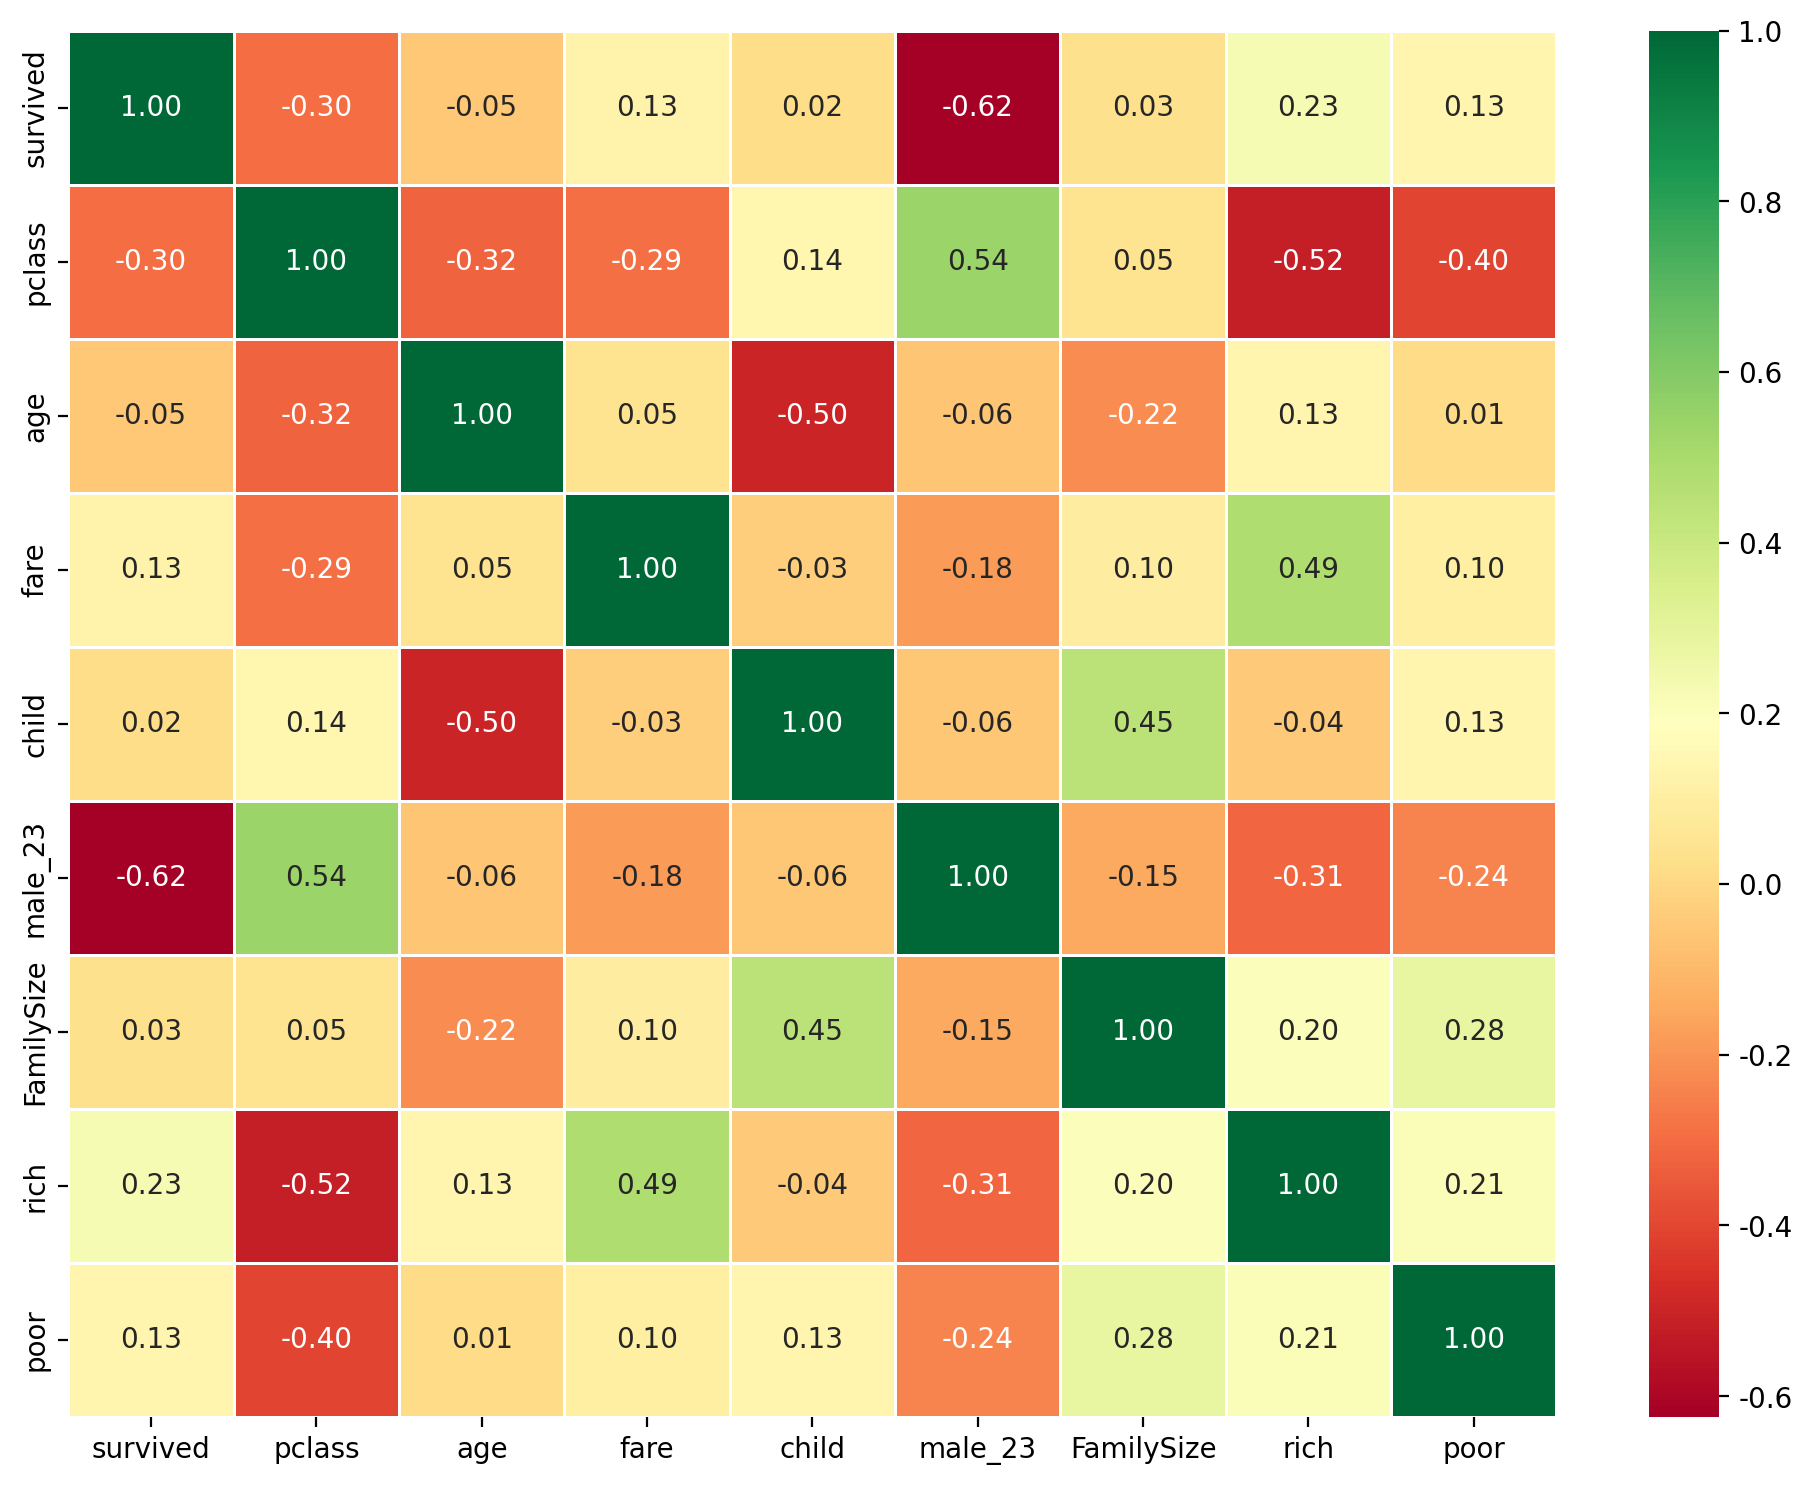

In [ ]:
print(tr.corr())
heatmap(tr)

### Data Scaling

In [ ]:
tr_1 = tr.copy()
te_1 = te.copy()
raw_te_1 = raw_te.copy()

In [ ]:
tr_1.head()

,survived,pclass,gender,age,fare,cabin,embarked,title,child,male_23,FamilySize,rich,poor,fareBand
812,1,3,female,2,0.0,U,S,Miss,0,0,1,0,0,하류
134,0,3,male,2,0.0,U,Q,Mr,0,1,1,0,0,하류
390,1,3,male,3,0.0,U,S,Mr,0,1,1,0,0,하류
305,0,3,male,1,0.0,U,C,Master,1,1,1,0,1,하류
203,0,3,male,3,0.0,U,S,Mr,0,1,1,0,1,하류


In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
tr_1['fare'] = std.fit_transform(tr_1['fare'].values.reshape(-1, 1))
te_1['fare'] = std.transform(te_1['fare'].values.reshape(-1, 1))
raw_te_1['fare'] = std.transform(raw_te_1['fare'].values.reshape(-1, 1))

tr_1['FamilySize'] = std.fit_transform(tr_1['FamilySize'].values.reshape(-1, 1))
te_1['FamilySize'] = std.transform(te_1['FamilySize'].values.reshape(-1, 1))
raw_te_1['FamilySize'] = std.transform(raw_te_1['FamilySize'].values.reshape(-1, 1))

PowerTransformer,StandardScaler이 모델 성능이 가장 높게 나와서 StandardScaler 사용

###  Data Encoding

#### One Hot Encoding

In [ ]:
one_tr = tr_1.copy()
one_te = te_1.copy()
one_raw_te = raw_te_1.copy()

In [ ]:
# del one_tr['pclass_gender_child']
# del one_te['pclass_gender_child']
# del one_raw_te['pclass_gender_child']

In [ ]:
one_tr.describe(exclude=np.number)

,gender,cabin,embarked,title,fareBand
count,641,641,641,641,641
unique,2,8,3,4,3
top,male,U,S,Mr,하류
freq,407,506,455,384,434


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc_cols = ['gender','embarked','title','fareBand','cabin']
normal_cols = one_tr.columns.difference(['gender','embarked','title','fareBand','cabin'])

#raw_test용 (survived를 제외시킨 column)
normal_cols_ori = normal_cols      
normal_cols_ori = normal_cols_ori.drop('survived')

normal_cols , normal_cols_ori

(Index(['FamilySize', 'age', 'child', 'fare', 'male_23', 'pclass', 'poor',
        'rich', 'survived'],
       dtype='object'),
 Index(['FamilySize', 'age', 'child', 'fare', 'male_23', 'pclass', 'poor',
        'rich'],
       dtype='object'))

In [ ]:
enc = OneHotEncoder()

#train
tmp_one_tr = pd.DataFrame(                              
    enc.fit_transform(one_tr[enc_cols]).toarray(),   
    columns = enc.get_feature_names_out()           
)
enc_one_tr = pd.concat(
    [one_tr[normal_cols].reset_index(drop=True), tmp_one_tr.reset_index(drop=True)]    
    , axis=1
)

# # test
tmp_one_te = pd.DataFrame(
    enc.transform(one_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_one_te = pd.concat(
    [one_te[normal_cols].reset_index(drop=True), tmp_one_te.reset_index(drop=True)]
    , axis=1
)

# raw_test
tmp_one_te = pd.DataFrame(
    enc.transform(one_raw_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)

enc_one_raw_te = pd.concat(
    [one_raw_te[normal_cols_ori].reset_index(drop=True), tmp_one_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_one_tr.shape} / {enc_one_te.shape} / {enc_one_raw_te.shape}')
enc_one_tr.head()

after: (641, 29) / (275, 29) / (393, 28)


,FamilySize,age,child,fare,male_23,pclass,poor,rich,survived,gender_female,...,fareBand_중류,fareBand_하류,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_U
0,-0.543352,2,0,-0.183295,0,3,0,0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.543352,2,0,-0.183295,1,3,0,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.543352,3,0,-0.183295,1,3,0,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.543352,1,1,-0.183295,1,3,1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.543352,3,0,-0.183295,1,3,1,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_tr = enc_one_tr['survived']
O_tr = enc_one_tr.drop(['survived'],axis=1)

y_te = enc_one_te['survived']
O_te = enc_one_te.drop(['survived'],axis=1)


O_tr.shape , O_te.shape , y_tr.shape , y_te.shape

((641, 28), (275, 28), (641,), (275,))

### Training

#### CatBoost


In [ ]:
 !pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
hp = {
    "random_state" : 42,
    "verbose" : 0 # 부스팅 단계 출력 안보이게 하기
}

model_O0 = CatBoostClassifier(**hp).fit(O_tr, y_tr)

In [ ]:
#AUC
from sklearn.metrics import roc_curve, auc 

y_pred = model_O0.predict_proba(O_te)[:,1]   # 예측값 / proba : 확률 예측  > 0과 1사이에 있는 값이 나옴 > 이 값을 submit 파일에 올리면 됨
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.9114934772829508


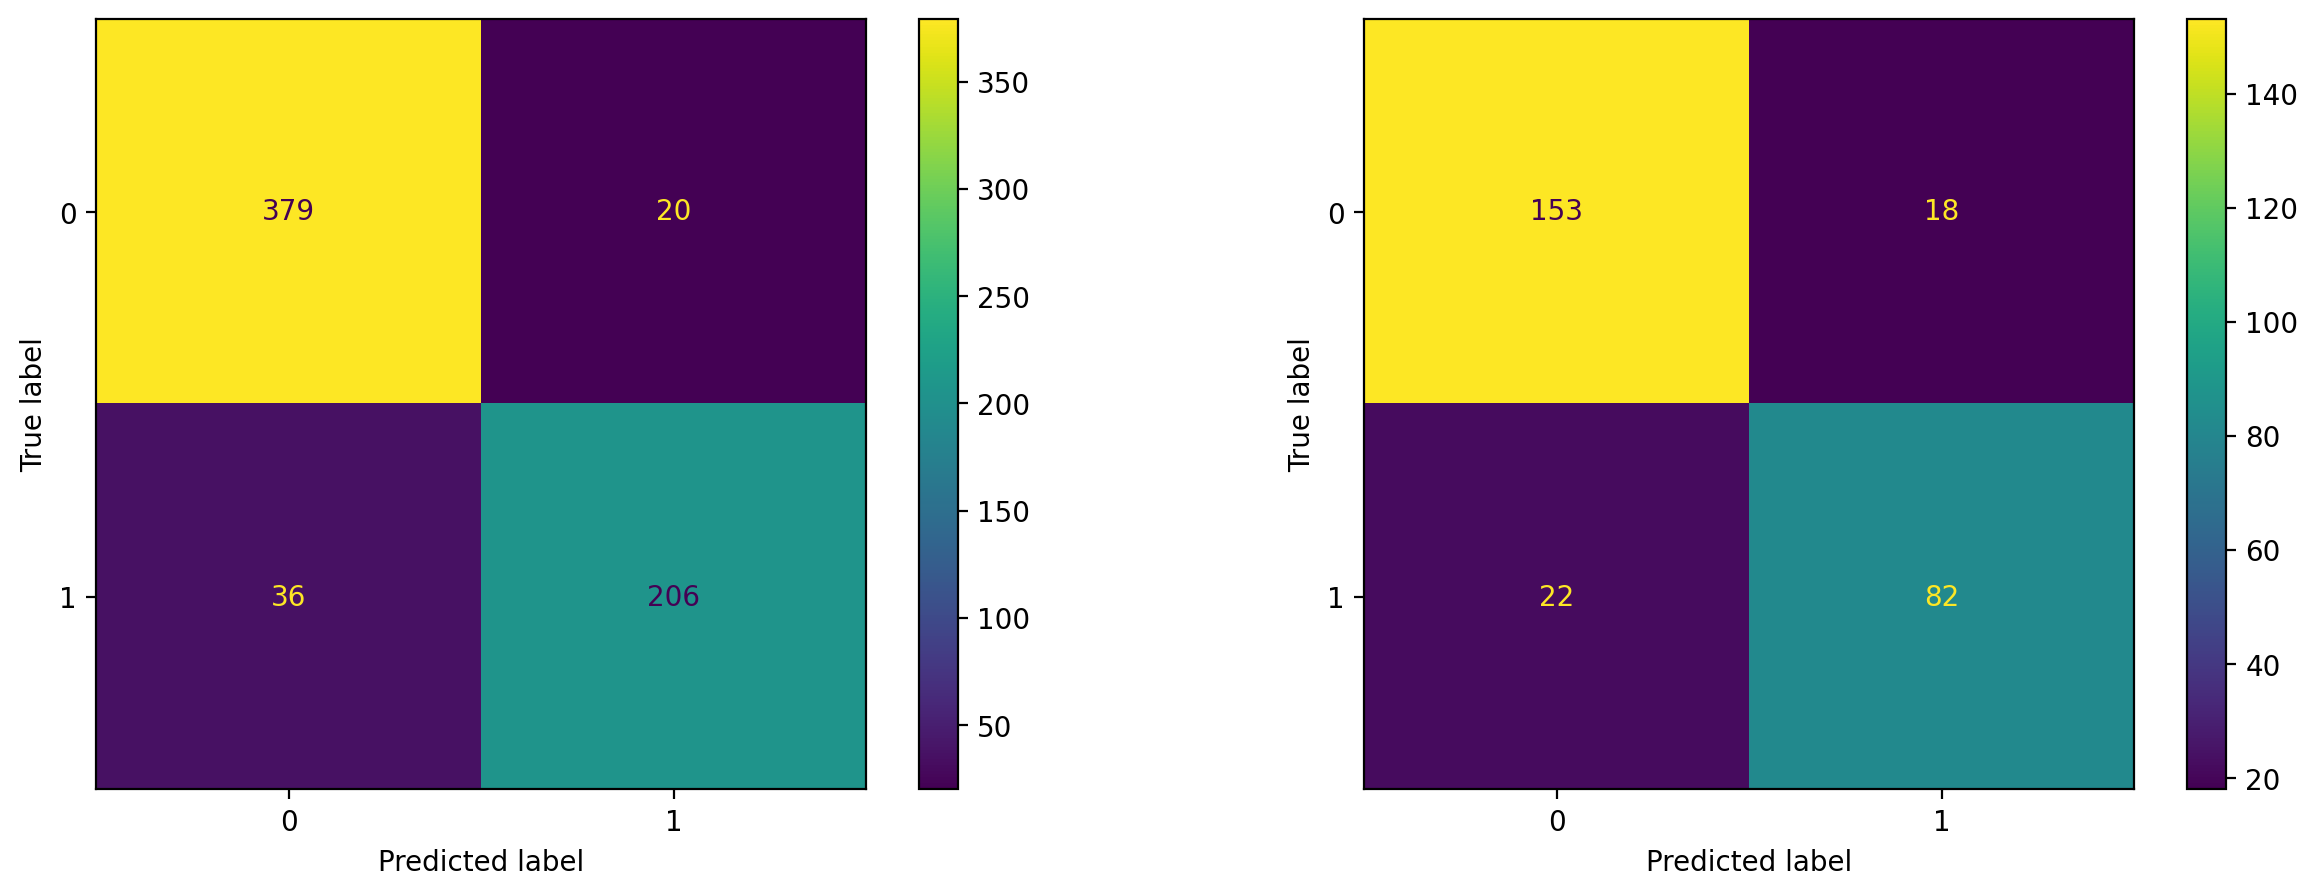

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       399
           1       0.91      0.85      0.88       242

    accuracy                           0.91       641
   macro avg       0.91      0.90      0.91       641
weighted avg       0.91      0.91      0.91       641

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       171
           1       0.82      0.79      0.80       104

    accuracy                           0.85       275
   macro avg       0.85      0.84      0.84       275
weighted avg       0.85      0.85      0.85       275



In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# predict 매서드 사용하여 예측값 뽑기 : modelV5 말고 최적값 숫자 넣어보기

from sklearn.base import BaseEstimator
X_tr_pred = model_O0.predict(O_tr)
X_te_pred = model_O0.predict(O_te)

# Confusion Matrix 그리기
fig , ax = plt.subplots(1,2,figsize=(15,5))
cm = confusion_matrix(y_tr,X_tr_pred) #(실제값, 예측값)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])
cm = confusion_matrix(y_te,X_te_pred) #(실제값, 예측값)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

# 통계치 표시
from sklearn.metrics import classification_report
print(classification_report(y_tr, X_tr_pred))
print('-'*100)
print(classification_report(y_te, X_te_pred))

#### Light GBM

One Hot Encoding

In [ ]:
from lightgbm import LGBMClassifier ,plot_importance

model_O1 = LGBMClassifier(random_state=42).fit(O_tr,y_tr)

In [ ]:
#AUC
from sklearn.metrics import roc_curve, auc 

y_pred = model_O1.predict_proba(O_te)[:,1]   # 예측값 / proba : 확률 예측  > 0과 1사이에 있는 값이 나옴 > 이 값을 submit 파일에 올리면 됨
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8876518218623483


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


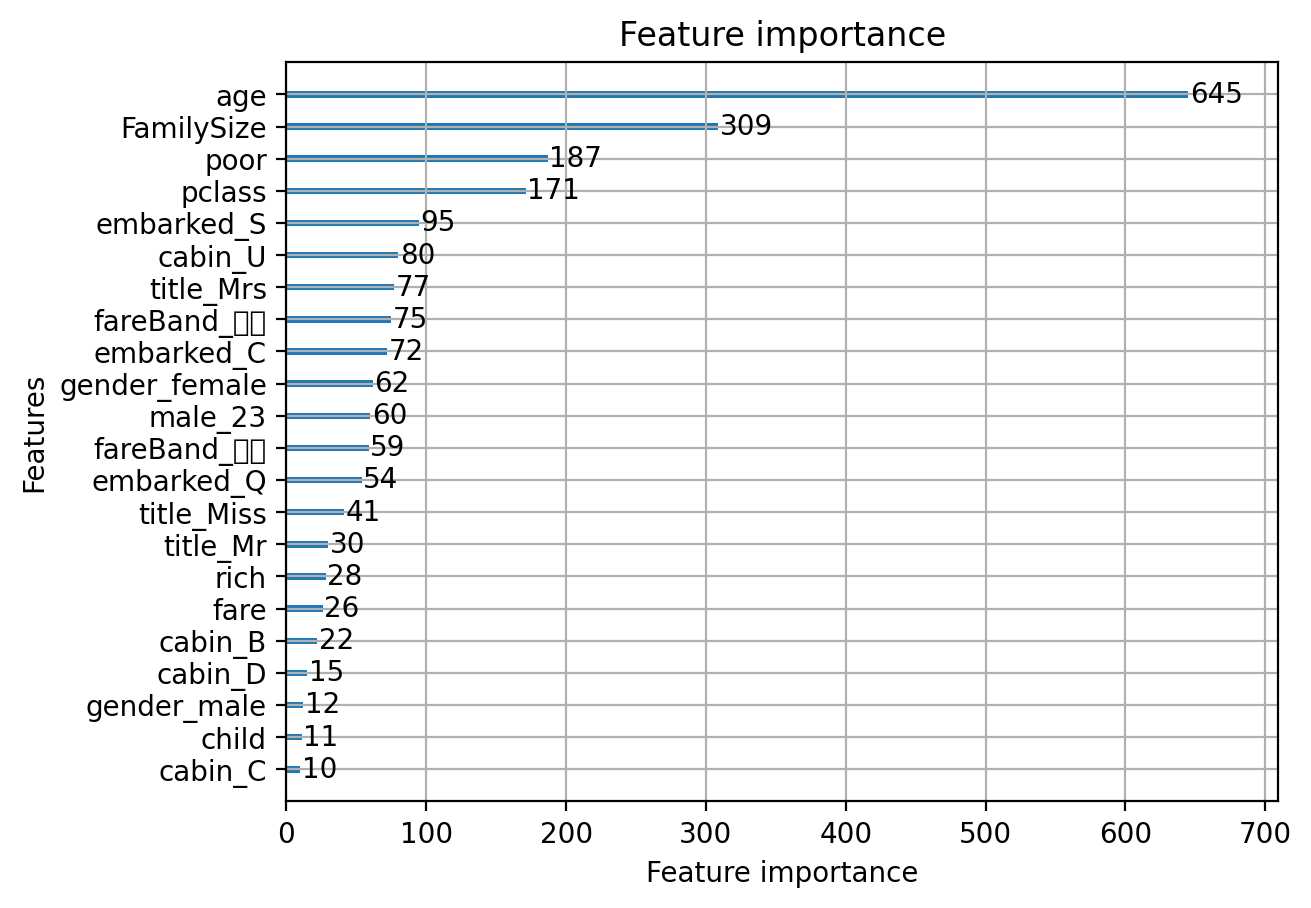

In [ ]:
plot_importance(model_O1)
plt.show()

#### XGboost

Target encoding

One Hot Encoding

In [ ]:
from xgboost import XGBClassifier ,plot_importance

model_O2 = XGBClassifier(random_state=42).fit(O_tr,y_tr)

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model_O2.predict_proba(O_te)[:,1]   # 예측값 / proba : 확률 예측  > 0과 1사이에 있는 값이 나옴 > 이 값을 submit 파일에 올리면 됨
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8770805218173641


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


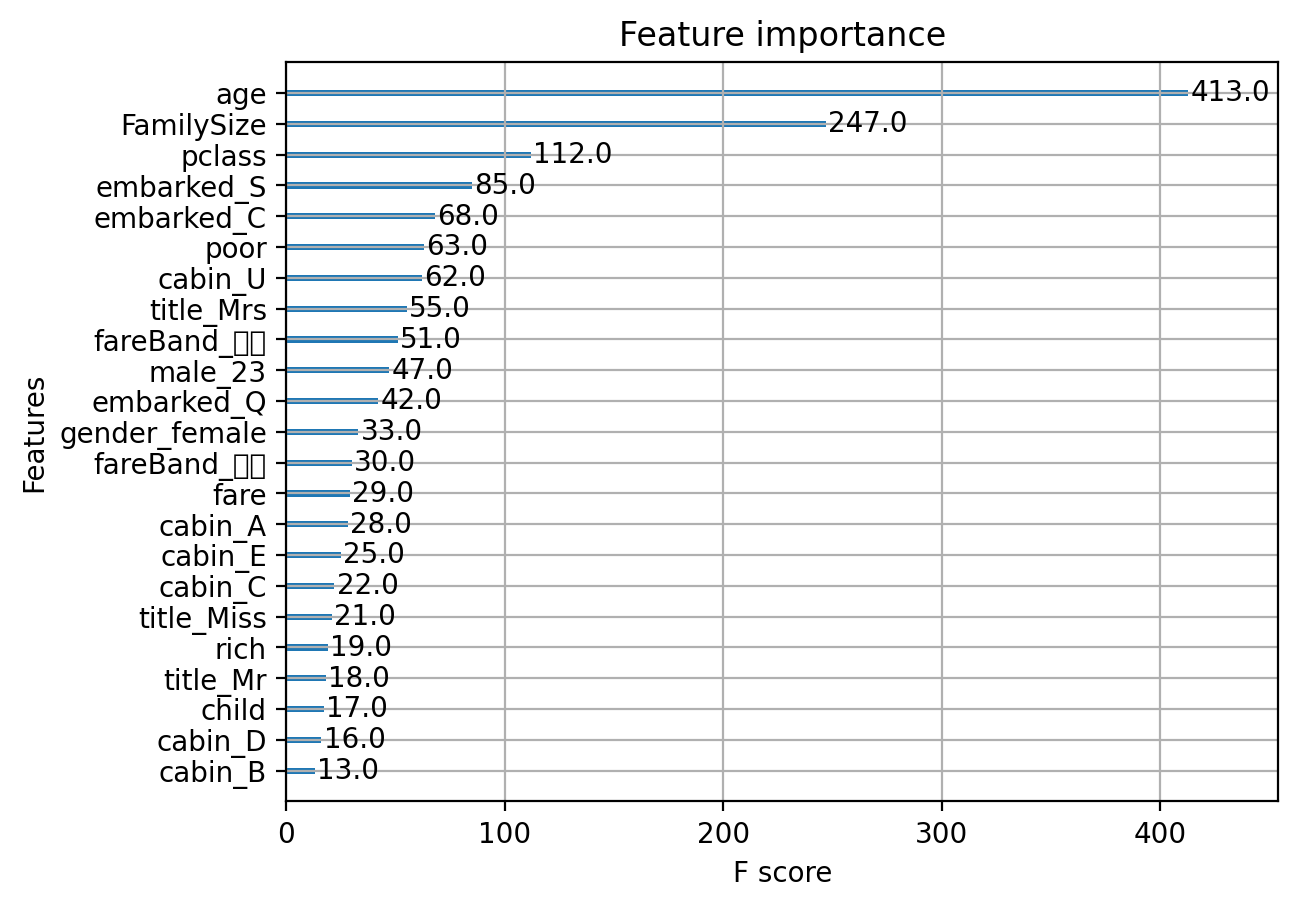

In [ ]:
plot_importance(model_O2)
plt.show()

### optuna - HPO

In [ ]:
#!pip install optuna

In [ ]:
# import optuna  # 옵튜나를 활용한 하이퍼 파라미터 튜닝 
# from sklearn.model_selection import cross_val_score
# from optuna.samplers import TPESampler
# from sklearn.model_selection import KFold, cross_val_score
# optuna.logging.disable_default_handler()

# class Objective:
#     def __init__(self,x_train,y_train,seed):
#         self.x_train = x_train
#         self.y_train = y_train
#         self.seed = seed
#         num_folds=2 # 학습시간을 줄이기 위해 2로 하였다. 일반적으로는 5
#         self.cv = KFold(n_splits=num_folds,shuffle=True,random_state=self.seed)
#     def __call__(self,trial):
#         hp = {
#             "max_depth" : trial.suggest_int("max_depth",2,5),
# #             'n_estimators' : trial.suggest_int("n_estimators",50,100,150,200,250),
#             "n_estimators" : trial.suggest_int("n_estimators",10,500,50),
#         }
#         model = CatBoostClassifier(random_state=self.seed,**hp)
#         scores = cross_val_score(model,self.x_train,self.y_train, cv = self.cv , scoring="roc_auc")
#         return np.mean(scores)

# sampler = TPESampler(seed=args.random_state) # 대체모델 부분
# # 스터디 객체
# study = optuna.create_study(
#     direction = "maximize", # maximize or minimize
#     sampler = sampler
# )
# objective = Objective(O_tr,y_tr,args.random_state)
# study.optimize(objective,n_trials=50)

# print("Best Score:", study.best_value) # 최고점수
# print("Best hp", study.best_params)

In [ ]:
# print("Best Score:", study.best_value) # 최고점수
# print("Best hp", study.best_params)

In [ ]:
# model = CatBoostClassifier(random_state=args.random_state, **study.best_params)
# model.fit(O_tr,y_tr)
# pred = model.predict_proba(O_te)[:,1]
# roc_auc_score(y_te,pred)

In [ ]:
# optuna.visualization.plot_param_importances(study)

### Submission

In [ ]:
ori_te_pred = model_O0.predict_proba(enc_one_raw_te)[:,1]
ori_te_pred.shape

(393,)

In [ ]:
ori_te_pred

array([0.69837088, 0.93867024, 0.90075146, 0.07500689, 0.89531243,
       0.88707983, 0.0658672 , 0.07474614, 0.60555263, 0.06479877,
       0.09162161, 0.02734803, 0.71640848, 0.746168  , 0.07859888,
       0.08453111, 0.05310627, 0.04999889, 0.09266301, 0.07474614,
       0.07326471, 0.02568356, 0.07474614, 0.01327626, 0.07303771,
       0.10834078, 0.09497957, 0.61162798, 0.67107609, 0.02305422,
       0.69978634, 0.71843244, 0.04295873, 0.18762825, 0.30248207,
       0.07476457, 0.96604797, 0.03664633, 0.21789522, 0.07050275,
       0.07500689, 0.97614078, 0.09432801, 0.99376659, 0.02568356,
       0.02166821, 0.35174401, 0.0703901 , 0.03424095, 0.03498854,
       0.69069017, 0.03688612, 0.99255476, 0.08649796, 0.7234502 ,
       0.90075146, 0.19755822, 0.08649796, 0.03664633, 0.20171639,
       0.9649483 , 0.71640848, 0.80753979, 0.02132749, 0.10834078,
       0.04564864, 0.65853514, 0.84130481, 0.07326471, 0.96175228,
       0.09266301, 0.6566792 , 0.69978634, 0.95390789, 0.03107

In [ ]:
submission = pd.read_csv(args.default_submission_csv)
submission.head()

,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [ ]:
submission['survived'] = ori_te_pred
print(f'{submission.isnull().sum().sum()}')
submission.head(10)

0


,passengerid,survived
0,916,0.698371
1,917,0.938670
2,918,0.900751
3,919,0.075007
4,920,0.895312
5,921,0.887080
6,922,0.065867
7,923,0.074746
8,924,0.605553
9,925,0.064799


In [ ]:
submission.to_csv(args.submission_csv, header=True, index=False)